# Описание:  
**Название проекта**

Проект: Линейные модели в машинном обучении

**Описание исследования.**

Интернет-магазин «В один клик» по отчету продаж увидел, что покупательская активность за прошлый период начала снижаться. Для поддержания активности постоянных клиентов руководство магазина обратисоль с задачей исследования.  

**Цель исследования.**

Разработать решение позволяющее увеличить покупательскую активность постоянных клиентов

**Действия, необходимые для достижения поставленной цели.**

Загрузить данные;  
Обработать;  
Проанализировать их;  
Выявить корреляции в данных;   
Подготовить данные для МО и обучить модель;  
Проверить метрики модели;
Выполнить предсказания используя модель;
Сделать вывод по проделанной работе;

**Исходные данные.**

От заказчика были получены три файла (market_file.csv, market_money.csv, market_time.csv, money.csv) со следущей структурой:  
1.  market_file.csv  
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
2. market_money.csv  
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.
3. market_time.csv  
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.
4. money.csv  
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.


**Данное исследование разделено по плану:**  
[1.Загрузка данных](#t001)  
[2. Предобработка данных](#t002)   
[3. Исследовательский анализ данныхъ](#t003)  
[4. Объединение таблиц](#t004)  
[5. Корреляционный анализ](#t005)  
[6. Использование пайплайнов](#t006)  
[7. Анализ важности признаков](#t007)  
[8. Сегментация покупателей](#t008)
[9. Общий вывод](#t009)

# 0. Подготовительные шаги и функции  


## Импортирую библиотеки

In [92]:
%pip install phik
%pip install shap
import os
import phik
import shap
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.stats import kstest
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\abrik\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\abrik\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Объявляю константы  

In [93]:
#константа локального пути
LOCAL_DATA_PATH = 'c:/ps/project/by_one_click/data/'
#константа пути в тренажере
TRAINER_DATA_PATH = '/datasets/'
#список имен датафреймов 
DF_NAMES = ['df_market_file', 'df_market_money', 'df_market_time', 'df_money']
# конатстна новой строки для использования в f' строках
NL = '\n'

<a id='t001'></a>
# 1. Загрузка данных 
## Для выполнения задачи заказчиком были переданы три набора данных  

Т.к. работу выполнял локально, в VScode добавил проверку где выполняется проект. Если не локально, то брать из расположения в тренажере.

## 1.1 Загрузка данных  

In [94]:
for f in DF_NAMES:
    if os.path.exists(LOCAL_DATA_PATH):
        globals()[f] = pd.read_csv(LOCAL_DATA_PATH + f.strip('df_') + '.csv')
    elif os.path.exists(TRAINER_DATA_PATH):
         globals()[f] = pd.read_csv(TRAINER_DATA_PATH + f.strip('df_') + '.csv')
    else:
        print('ALARMA! No files found!')


Посмотрю на то, что загрузилось.

In [95]:
for f in DF_NAMES:
    print(f'Датасет {f}')
    display(globals()[f].sample(5).T)

Датасет df_market_file


,822,496,691,619,254
id,216170,215844,216039,215967,215602
Покупательская активность,Прежний уровень,Снизилась,Прежний уровень,Прежний уровень,Снизилась
Тип сервиса,стандарт,премиум,премиум,стандарт,премиум
Разрешить сообщать,да,да,да,нет,да
Маркет_актив_6_мес,4.7,4.3,4.2,4.1,3.5
Маркет_актив_тек_мес,4,4,4,3,4
Длительность,955,1041,919,775,1072
Акционные_покупки,0.25,0.99,0.14,0.15,0.35
Популярная_категория,Товары для детей,Кухонная посуда,Домашний текстиль,Косметика и аксесуары,Техника для красоты и здоровья
Средний_просмотр_категорий_за_визит,4,4,3,4,3


Датасет df_market_money


,1302,2341,3620,1460,1980
id,215782,216128,216554,215834,216008
Период,текущий_месяц,предыдущий_месяц,текущий_месяц,препредыдущий_месяц,препредыдущий_месяц
Выручка,5750.4,4936.0,7114.2,4635.0,4999.0


Датасет df_market_time


,2062,402,1975,190,1006
id,216379,215549,216335,215443,215851
Период,предыдцщий_месяц,текущий_месяц,предыдцщий_месяц,текущий_месяц,предыдцщий_месяц
минут,13,12,16,8,17


Датасет df_money


,216022;5,216031;5,216058;6,216010;4,215627;4
id;Прибыль,13.0,81.0,58.0,23.0,92.0


df_money криво загрузился. Ситуация о которой сказано в задании к проекту. Перезагружу DF с правильными разделителями.

In [96]:
f = 'df_money'
if os.path.exists(LOCAL_DATA_PATH):
    globals()[f] = pd.read_csv(LOCAL_DATA_PATH + f.strip('df_') + '.csv', sep=';', decimal=",")
elif os.path.exists(TRAINER_DATA_PATH):
    globals()[f] = pd.read_csv(TRAINER_DATA_PATH + f.strip('df_') + '.csv', sep=';', decimal=",")

Посмотрю как загрузилось в этот раз

In [97]:
display(df_money.head(10))

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


## 1.2 Проверка содержимого в загруженных данных

Просмотрел загруженные данные. Сверил их с описанием. Несоответствия описанным данным не обнаружил.

<a id='t002'></a>  
# 2. Предобработка данных

## Посмотрю соответствие типов столбцов описанным в задаче типам.

In [98]:
for f in DF_NAMES:
    print(f'Датасет {f}')
    display(globals()[f].info(True))

Датасет df_market_file
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_

None

Датасет df_market_money
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

Датасет df_market_time
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

Датасет df_money
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

Типы данных соответствуют хранимым ими данным. Пропусков нет.

## Проверю таблицы на дубликаты

##### Выведу список явных дубликатов

In [99]:
for f in DF_NAMES:
    print(f'В датасете {f} найдено дубликатов: {globals()[f].duplicated().sum()}')

В датасете df_market_file найдено дубликатов: 0
В датасете df_market_money найдено дубликатов: 0
В датасете df_market_time найдено дубликатов: 0
В датасете df_money найдено дубликатов: 0


Явных нет. Поищу неявные.

Для каждой таблицы сформирую список столбцов с категоримальными данными, а остальные будут численными.

In [100]:
for f in DF_NAMES:
    print(f'Столбцы датафрейма {f}')
    globals()['col_cat_' + f.strip('df_')] = globals()[f].select_dtypes(include='object').columns.to_list()
    globals()['col_num_' + f.strip('df_')] = [x for x in globals()[f].columns.to_list() if x not in globals()['col_cat_' + f.strip('df_')]]
    print(f"Категориальные столбцы: \n {globals()['col_cat_' + f.strip('df_')]}\n"
          f"Численные столбцы: \n {globals()['col_num_' + f.strip('df_')]} \n")

Столбцы датафрейма df_market_file
Категориальные столбцы: 
 ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']
Численные столбцы: 
 ['id', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит'] 

Столбцы датафрейма df_market_money
Категориальные столбцы: 
 ['Период']
Численные столбцы: 
 ['id', 'Выручка'] 

Столбцы датафрейма df_market_time
Категориальные столбцы: 
 ['Период']
Численные столбцы: 
 ['id', 'минут'] 

Столбцы датафрейма df_money
Категориальные столбцы: 
 []
Численные столбцы: 
 ['id', 'Прибыль'] 



Взгляну на уникальные значения в категориальных столбцах. Не исключено, что в них могут быть очепятки и\или иные артефакты.

In [101]:
for f in DF_NAMES:
    print(f"Датафрейм {f}")
    for c in globals()['col_cat_' + f.strip('df_')]:
        print(f"Уникальные значения столбца {c}:\n"  
              f"{(globals()[f][c]).unique()}")
    print('\n')

Датафрейм df_market_file
Уникальные значения столбца Покупательская активность:
['Снизилась' 'Прежний уровень']
Уникальные значения столбца Тип сервиса:
['премиум' 'стандартт' 'стандарт']
Уникальные значения столбца Разрешить сообщать:
['да' 'нет']
Уникальные значения столбца Популярная_категория:
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


Датафрейм df_market_money
Уникальные значения столбца Период:
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


Датафрейм df_market_time
Уникальные значения столбца Период:
['текущий_месяц' 'предыдцщий_месяц']


Датафрейм df_money




В столбцах "Тип сервиса" таблицы "df_market_file" очепятки "стандартт" и "стандарт"  

Исправлю их кодом ниже

In [102]:
df_market_file.loc[df_market_file['Тип сервиса'] == 'стандартт', 'Тип сервиса'] = 'стандарт'

Привел к порядку. Проверю еще раз не осталось ли дубликатов.

In [103]:
for f in DF_NAMES:
    print(f"Датафрейм {f}")
    for c in globals()['col_cat_' + f.strip('df_')]:
        print(f"Уникальные значения столбца '{c}':\n"  
              f"{(globals()[f][c]).unique()}")
    print('\n')

Датафрейм df_market_file
Уникальные значения столбца 'Покупательская активность':
['Снизилась' 'Прежний уровень']
Уникальные значения столбца 'Тип сервиса':
['премиум' 'стандарт']
Уникальные значения столбца 'Разрешить сообщать':
['да' 'нет']
Уникальные значения столбца 'Популярная_категория':
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


Датафрейм df_market_money
Уникальные значения столбца 'Период':
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


Датафрейм df_market_time
Уникальные значения столбца 'Период':
['текущий_месяц' 'предыдцщий_месяц']


Датафрейм df_money




<a id='t003'></a>  
# 3. Исследовательский анализ данных

По условиям задания необходимо взять данные пользователей с активностью за последние 3 месяца.

In [104]:
df_market_file1 = df_market_file[df_market_file.index.isin(pd.pivot_table(df_market_money, 
                                                                         index = ['id'], 
                                                                         values=['Выручка'], 
                                                                         aggfunc='sum').reset_index().index)]

In [105]:
display(df_market_file1)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


In [106]:
print((df_market_money[df_market_money['Выручка'] > 0]).index)
df_market_file2 = df_market_file[df_market_file.index.isin(df_market_money[df_market_money['Выручка'] > 0].index)]

display(df_market_file2)

Index([   1,    3,    4,    5,    6,    7,    8,    9,   10,   11,
       ...
       3890, 3891, 3892, 3893, 3894, 3895, 3896, 3897, 3898, 3899],
      dtype='int64', length=3894)


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


### Выведу описательную статистику по каждой таблице

In [107]:
for f in DF_NAMES:
    print(f"Датафрейм {f}")
    print(f"{(globals()[f]).describe()}")
        
    print('\n')

Датафрейм df_market_file
                  id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count    1300.000000         1300.000000           1300.000000   1300.000000   
mean   215997.500000            4.253769              4.011538    601.898462   
std       375.421985            1.014814              0.696868    249.856289   
min    215348.000000            0.900000              3.000000    110.000000   
25%    215672.750000            3.700000              4.000000    405.500000   
50%    215997.500000            4.200000              4.000000    606.000000   
75%    216322.250000            4.900000              4.000000    806.000000   
max    216647.000000            6.600000              5.000000   1079.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.355

У столбца "Выручка" таблицы "df_market_money" мне показался аномальным максимум. Проверю не ошибка ли это. Выведу значения более 10000.

In [108]:
display(df_market_money[df_market_money['Выручка'] > 10000])

,id,Период,Выручка
98,215380,текущий_месяц,106862.2


Всего одно значение выше двухкратного среднего. Даже если не опечатка, а реальное значение его нужно удалить т.к. оно сильно испортит всю расчеты дальше.

In [109]:
df_market_money = df_market_money.drop(df_market_money[df_market_money['Выручка'] > 10000].index)
df_market_money.describe()

,id,Выручка
count,3899.000000,3899.00000
mean,215997.658374,4999.57743
std,375.243472,706.99988
min,215348.000000,0.00000
25%,215673.000000,4590.10000
50%,215998.000000,4957.00000
75%,216322.500000,5363.00000
max,216647.000000,7799.40000


Теперь выглядет более реалистично.

### Построю графики

По условиям задания необходимо поизвести анализ для пользователей с активностью (покупками) не менее трех месяцев. В таблице "df_money" хранятся записи о продажах за последние три месяца и минимум, как я выснил чуть раньше больше 0. Следовательно все 1300 записей в df_market_file делали покупки за последние 3 месяца.

Категориальные признаки

Гистограмма распределения значений для таблицы df_market_file


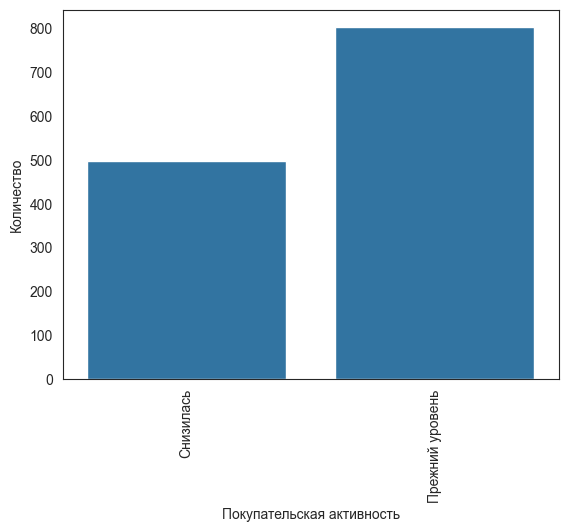

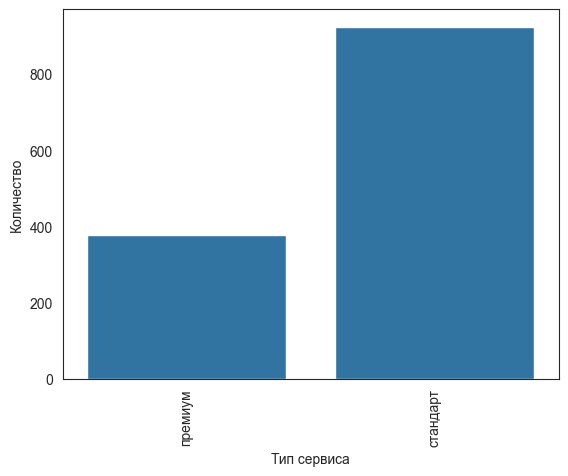

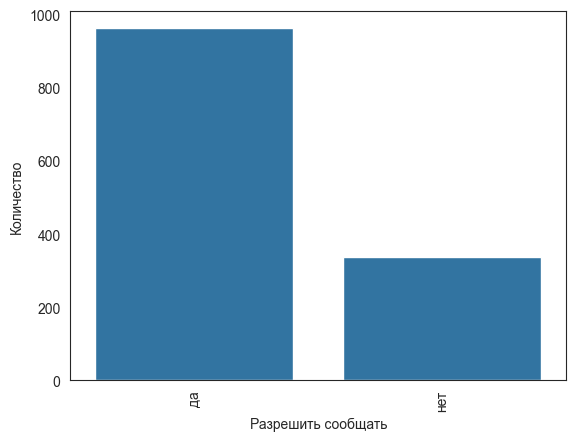

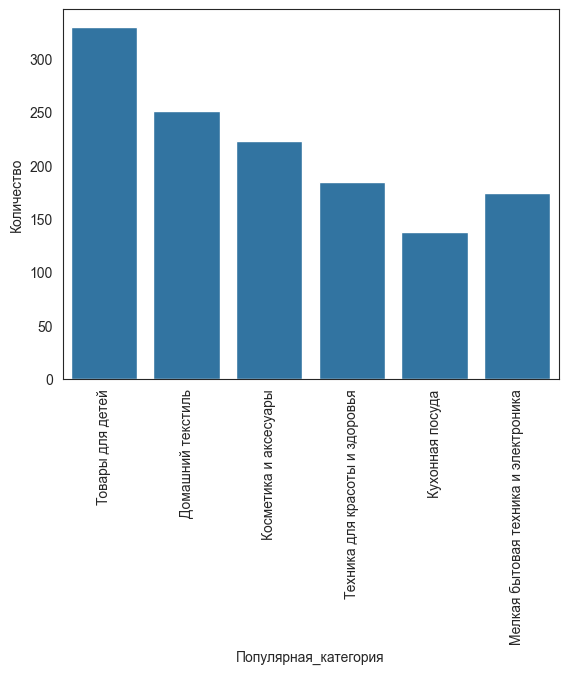

Гистограмма распределения значений для таблицы df_market_money


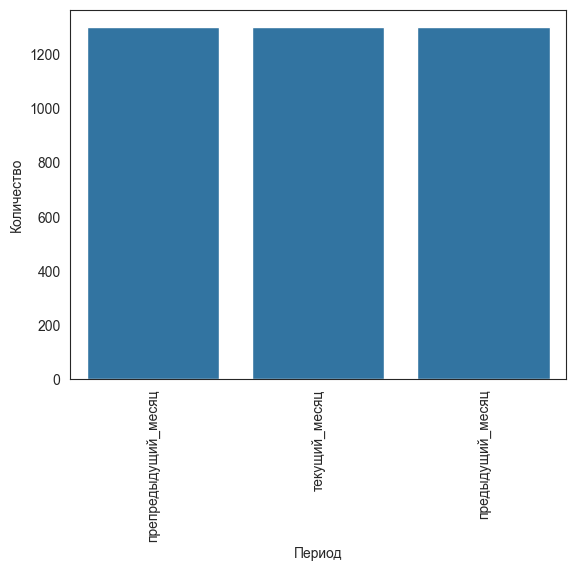

Гистограмма распределения значений для таблицы df_market_time


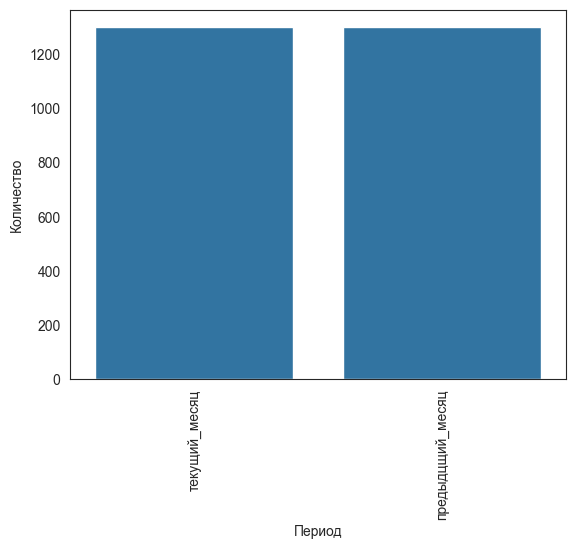

Гистограмма распределения значений для таблицы df_money


In [110]:
for f in DF_NAMES:
    print(f'Гистограмма распределения значений для таблицы {f}')
    for c in globals()['col_cat_' + f.strip('df_')]:
        ax = sns.countplot(x=c, data = globals()[f])
        ax.set(xlabel=c, ylabel='Количество')
        plt.xticks(rotation=90)
        plt.show()

Построю для численных данных пару графиков гистограмму и ящик с усами, а заодно тест Колмогорова-Смирнова, чтобы получить нормальность распределения.

"Пара графиков для таблицы df_market_file


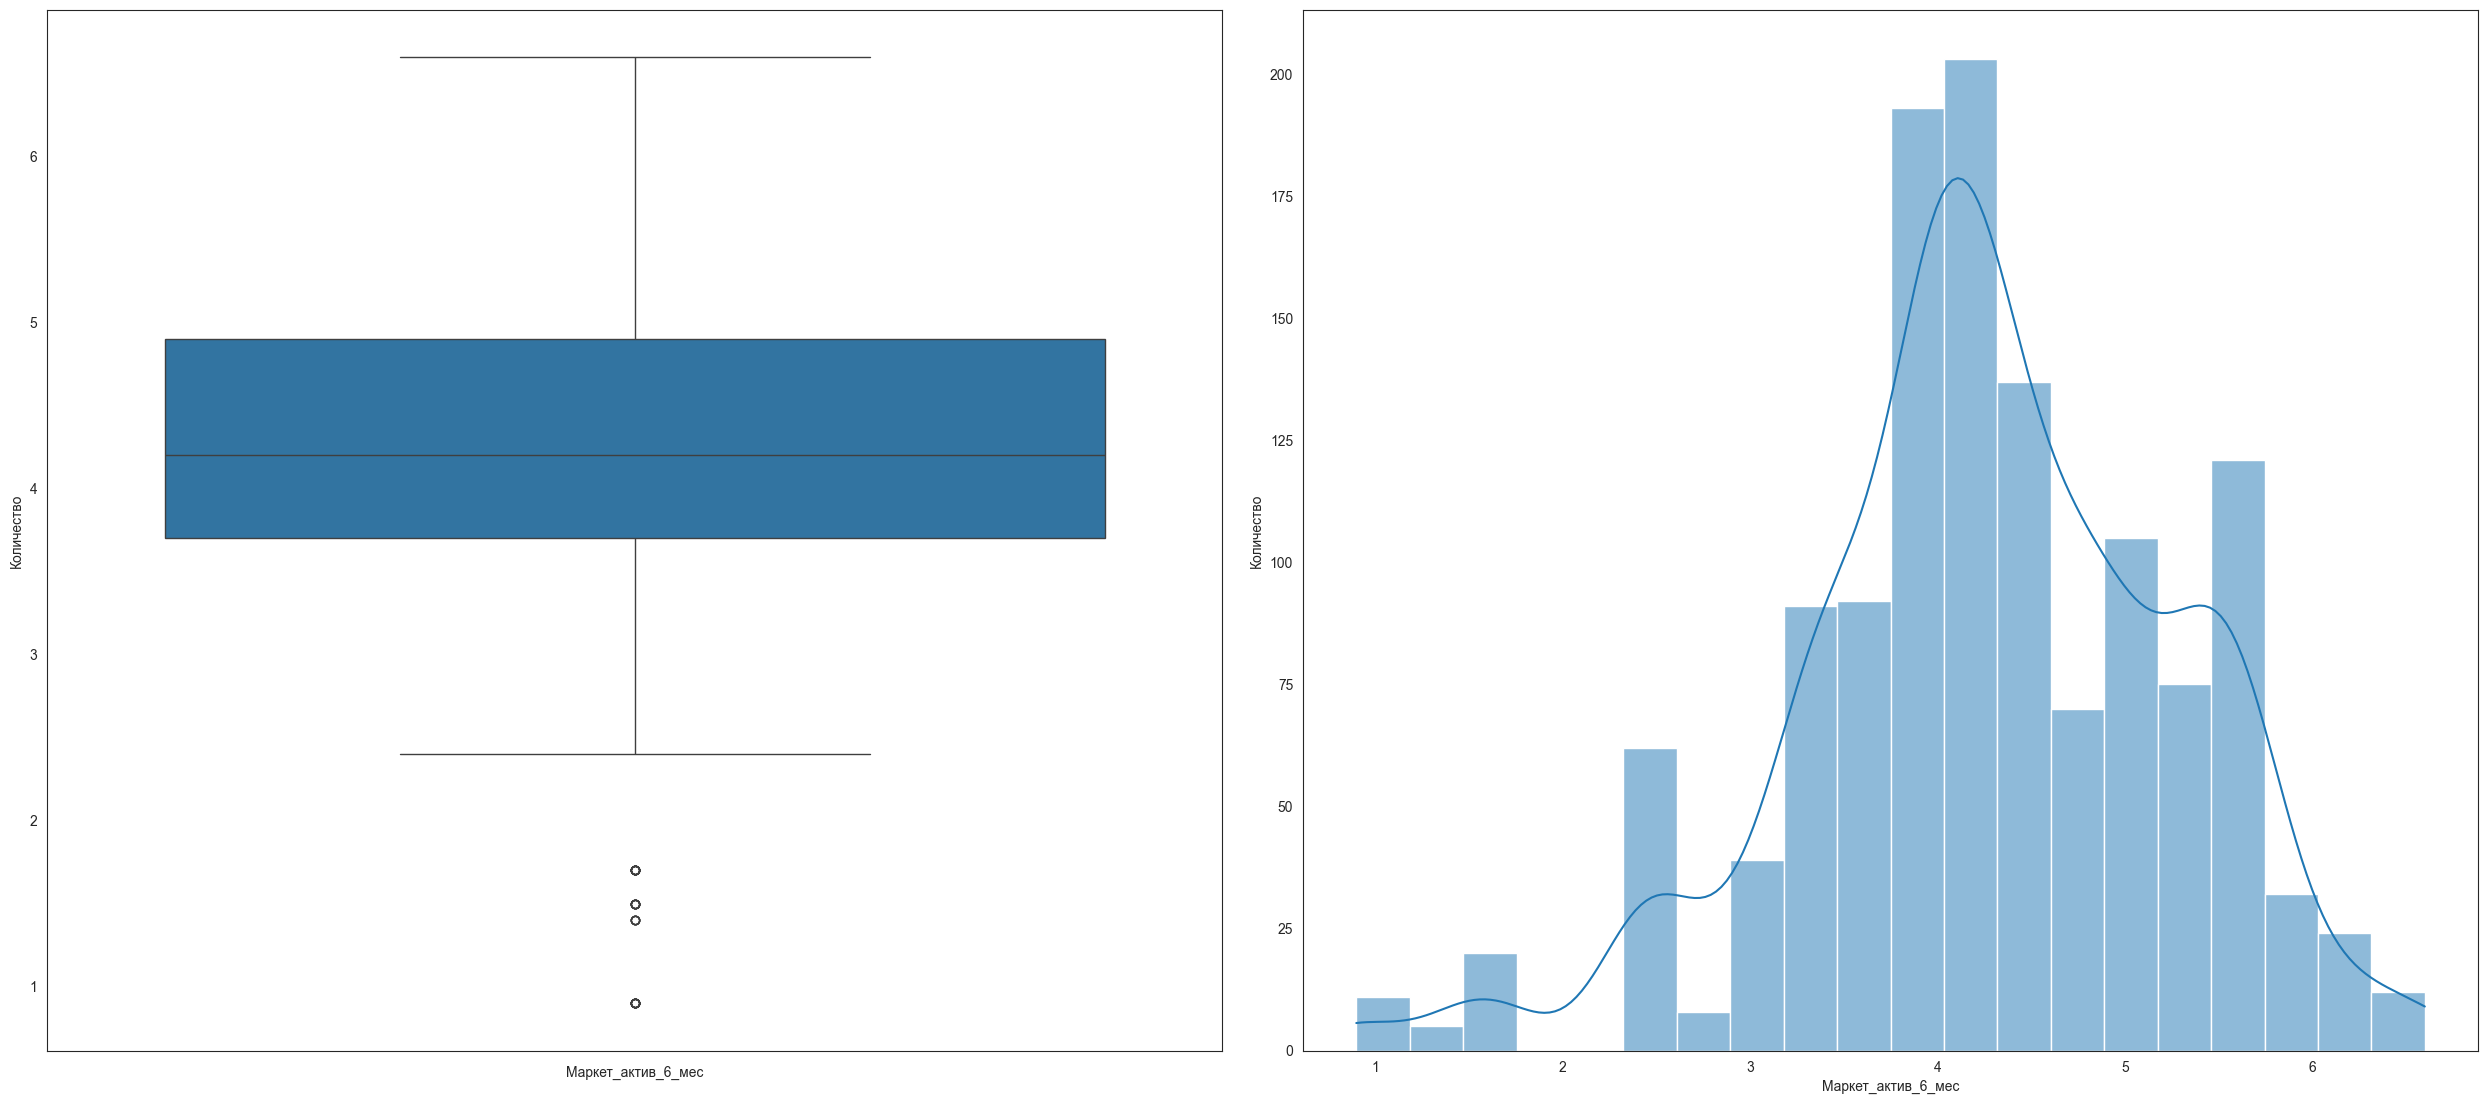

KstestResult(statistic=0.9641101563830962, pvalue=0.0, statistic_location=2.4, statistic_sign=-1)


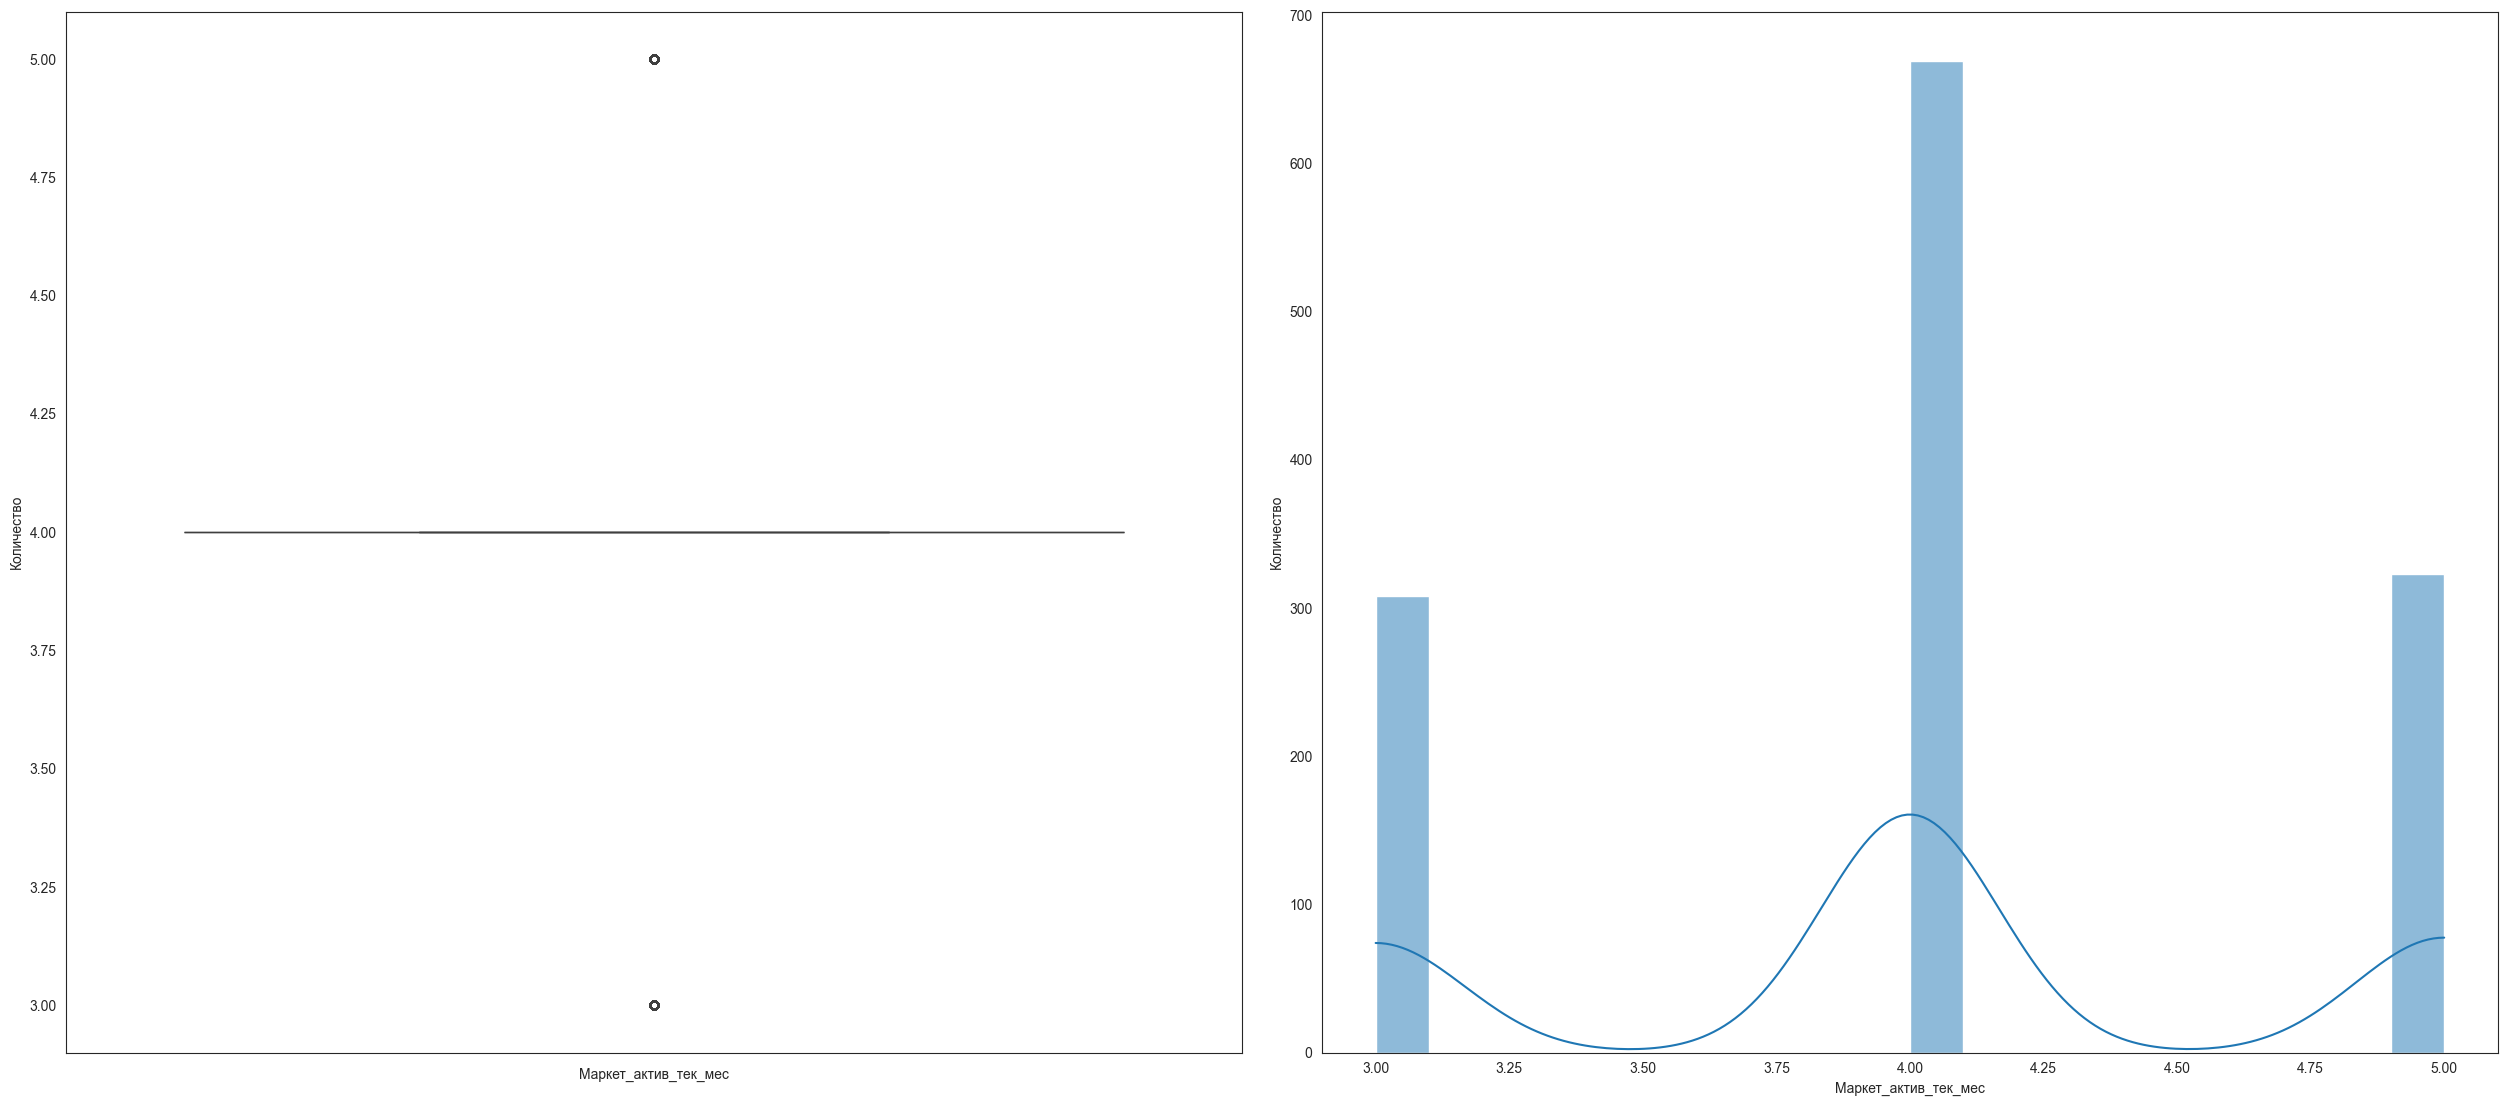

KstestResult(statistic=0.9986501019683699, pvalue=0.0, statistic_location=3, statistic_sign=-1)


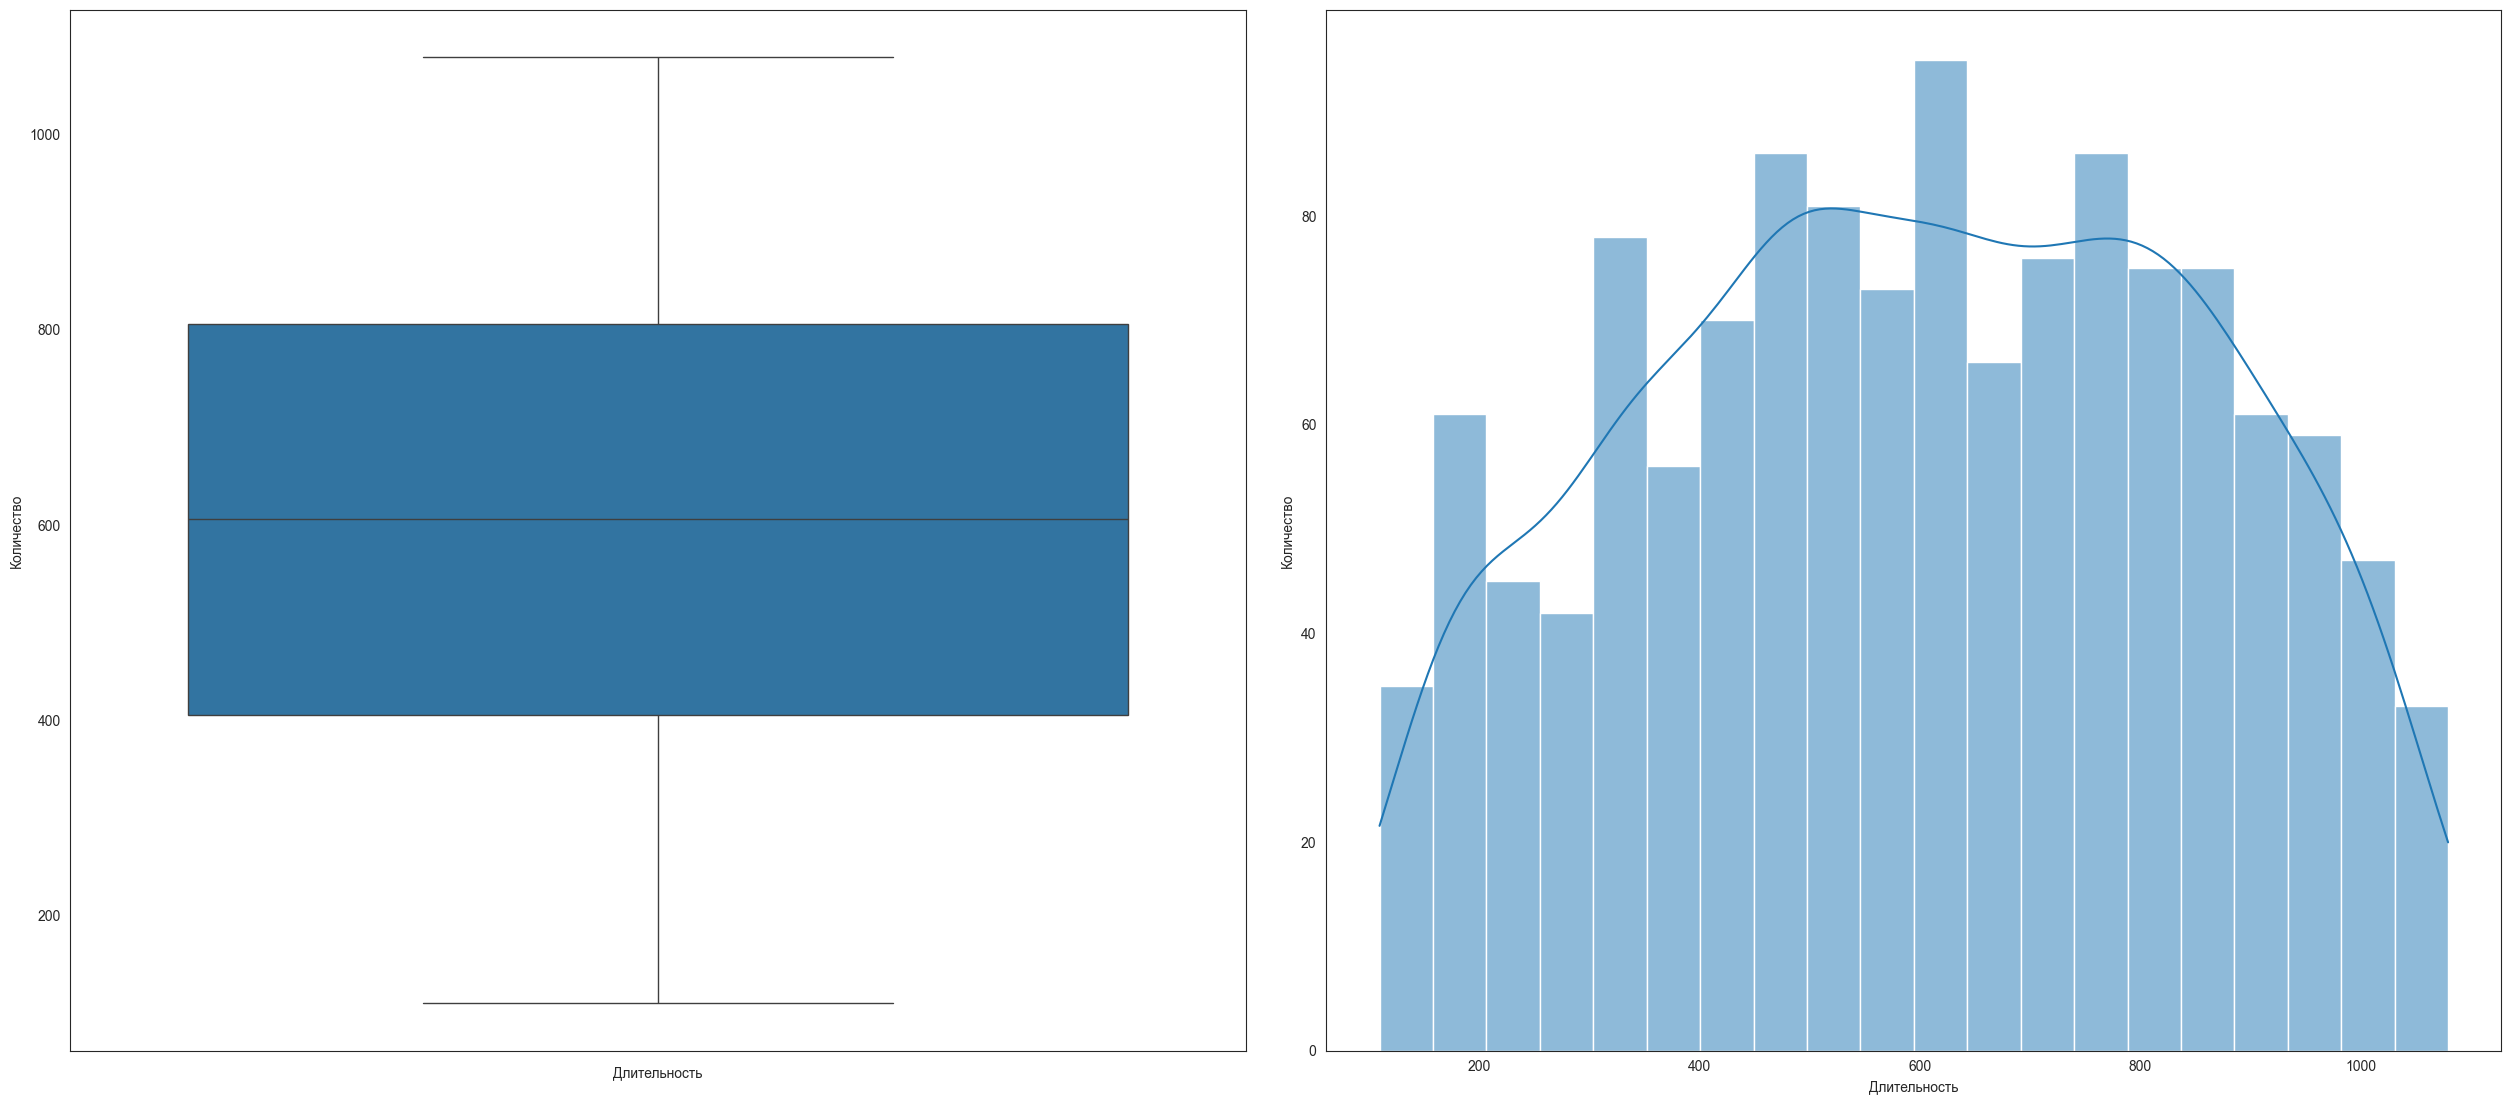

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=110, statistic_sign=-1)


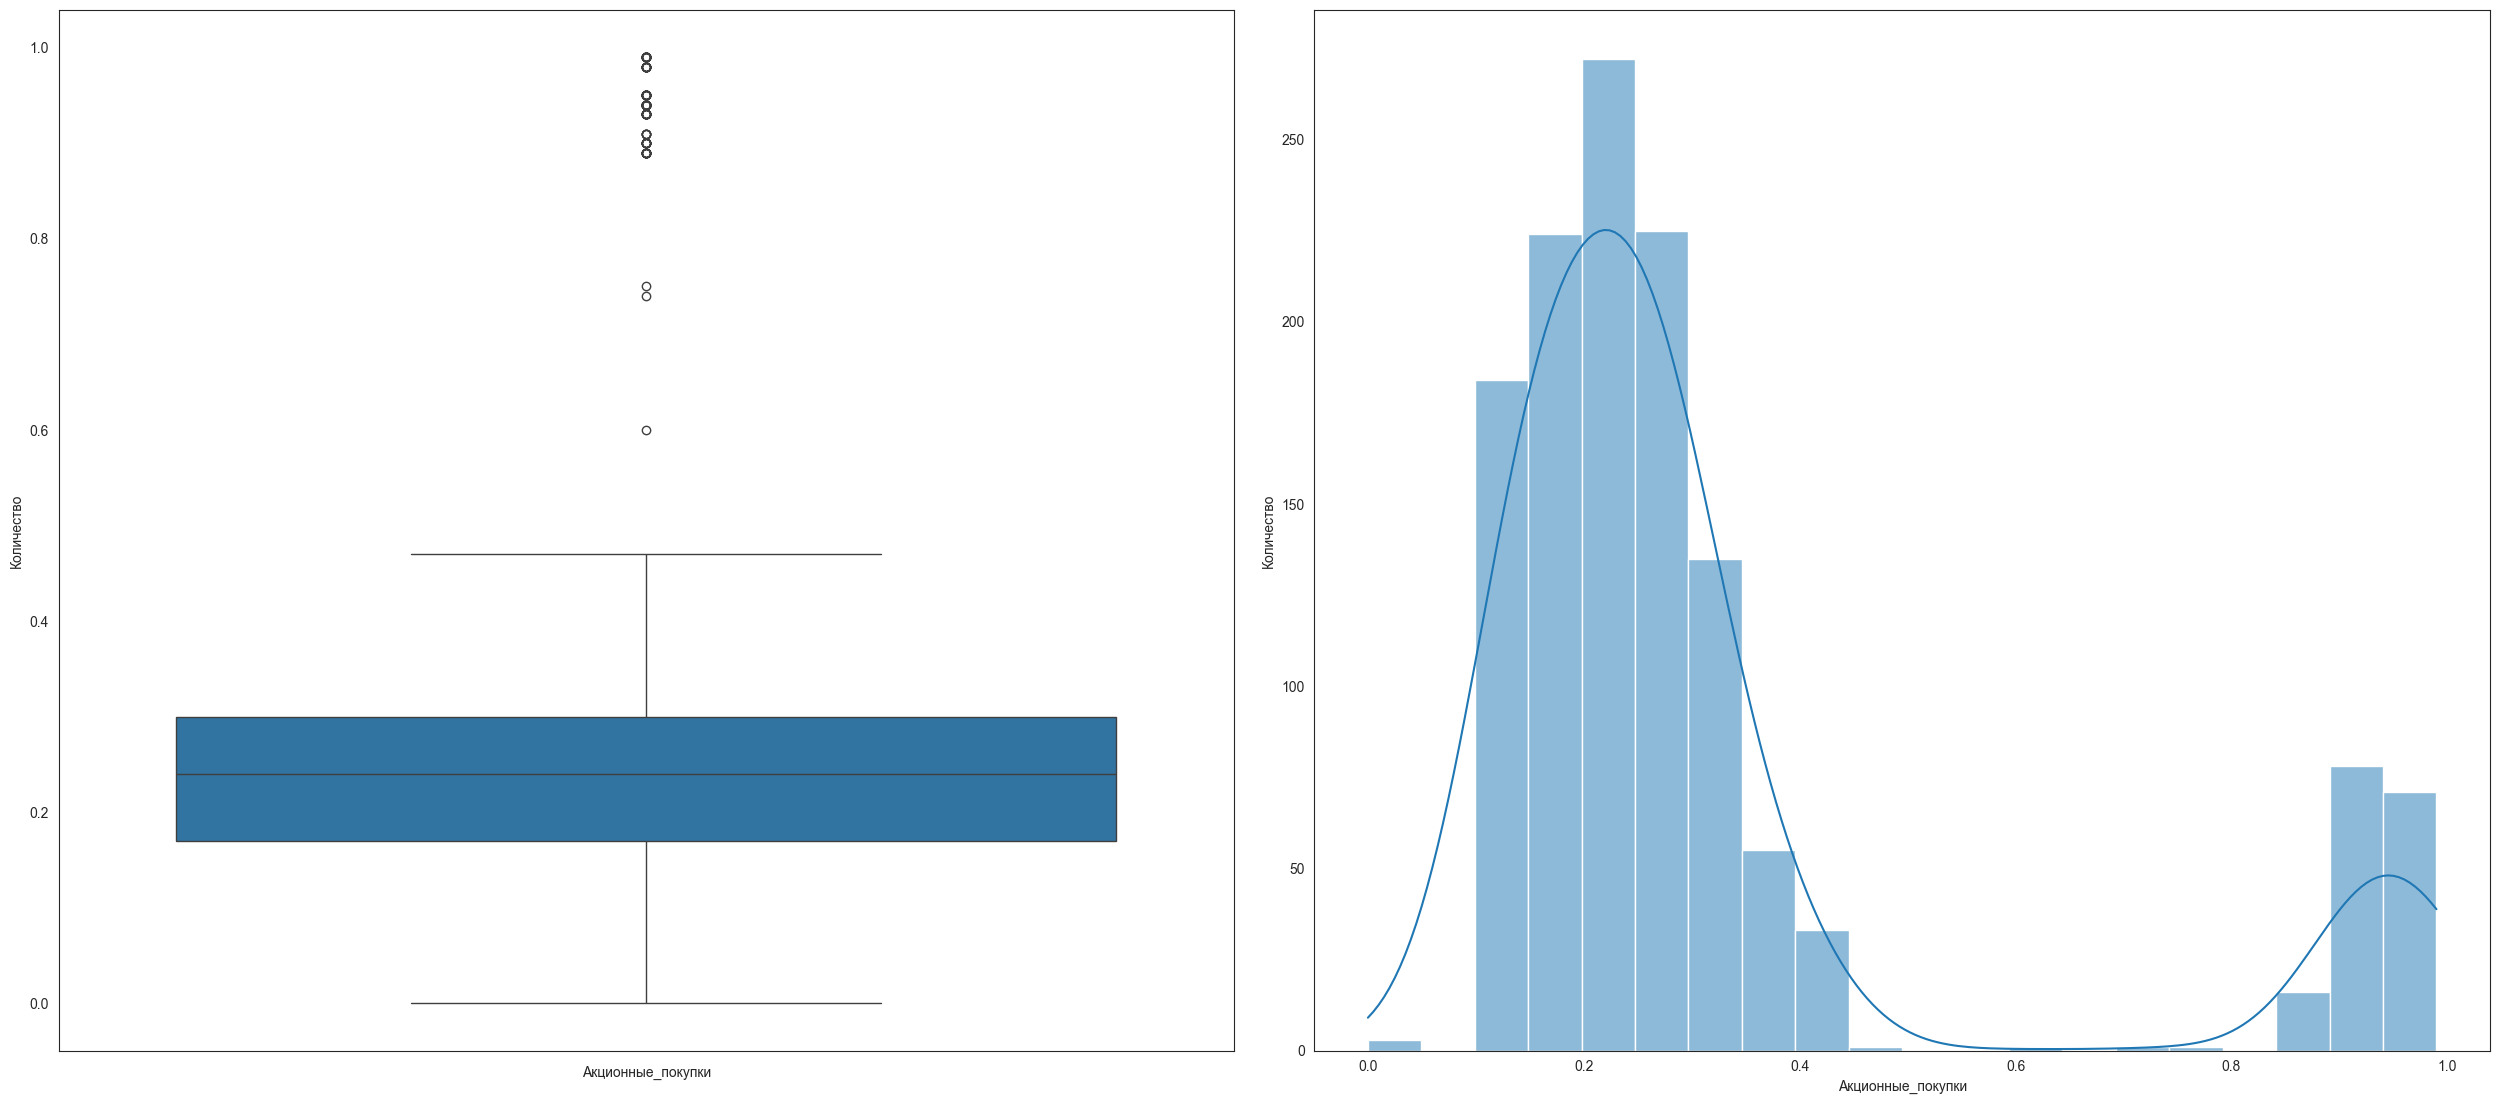

KstestResult(statistic=0.5414876202346245, pvalue=0.0, statistic_location=0.11, statistic_sign=-1)


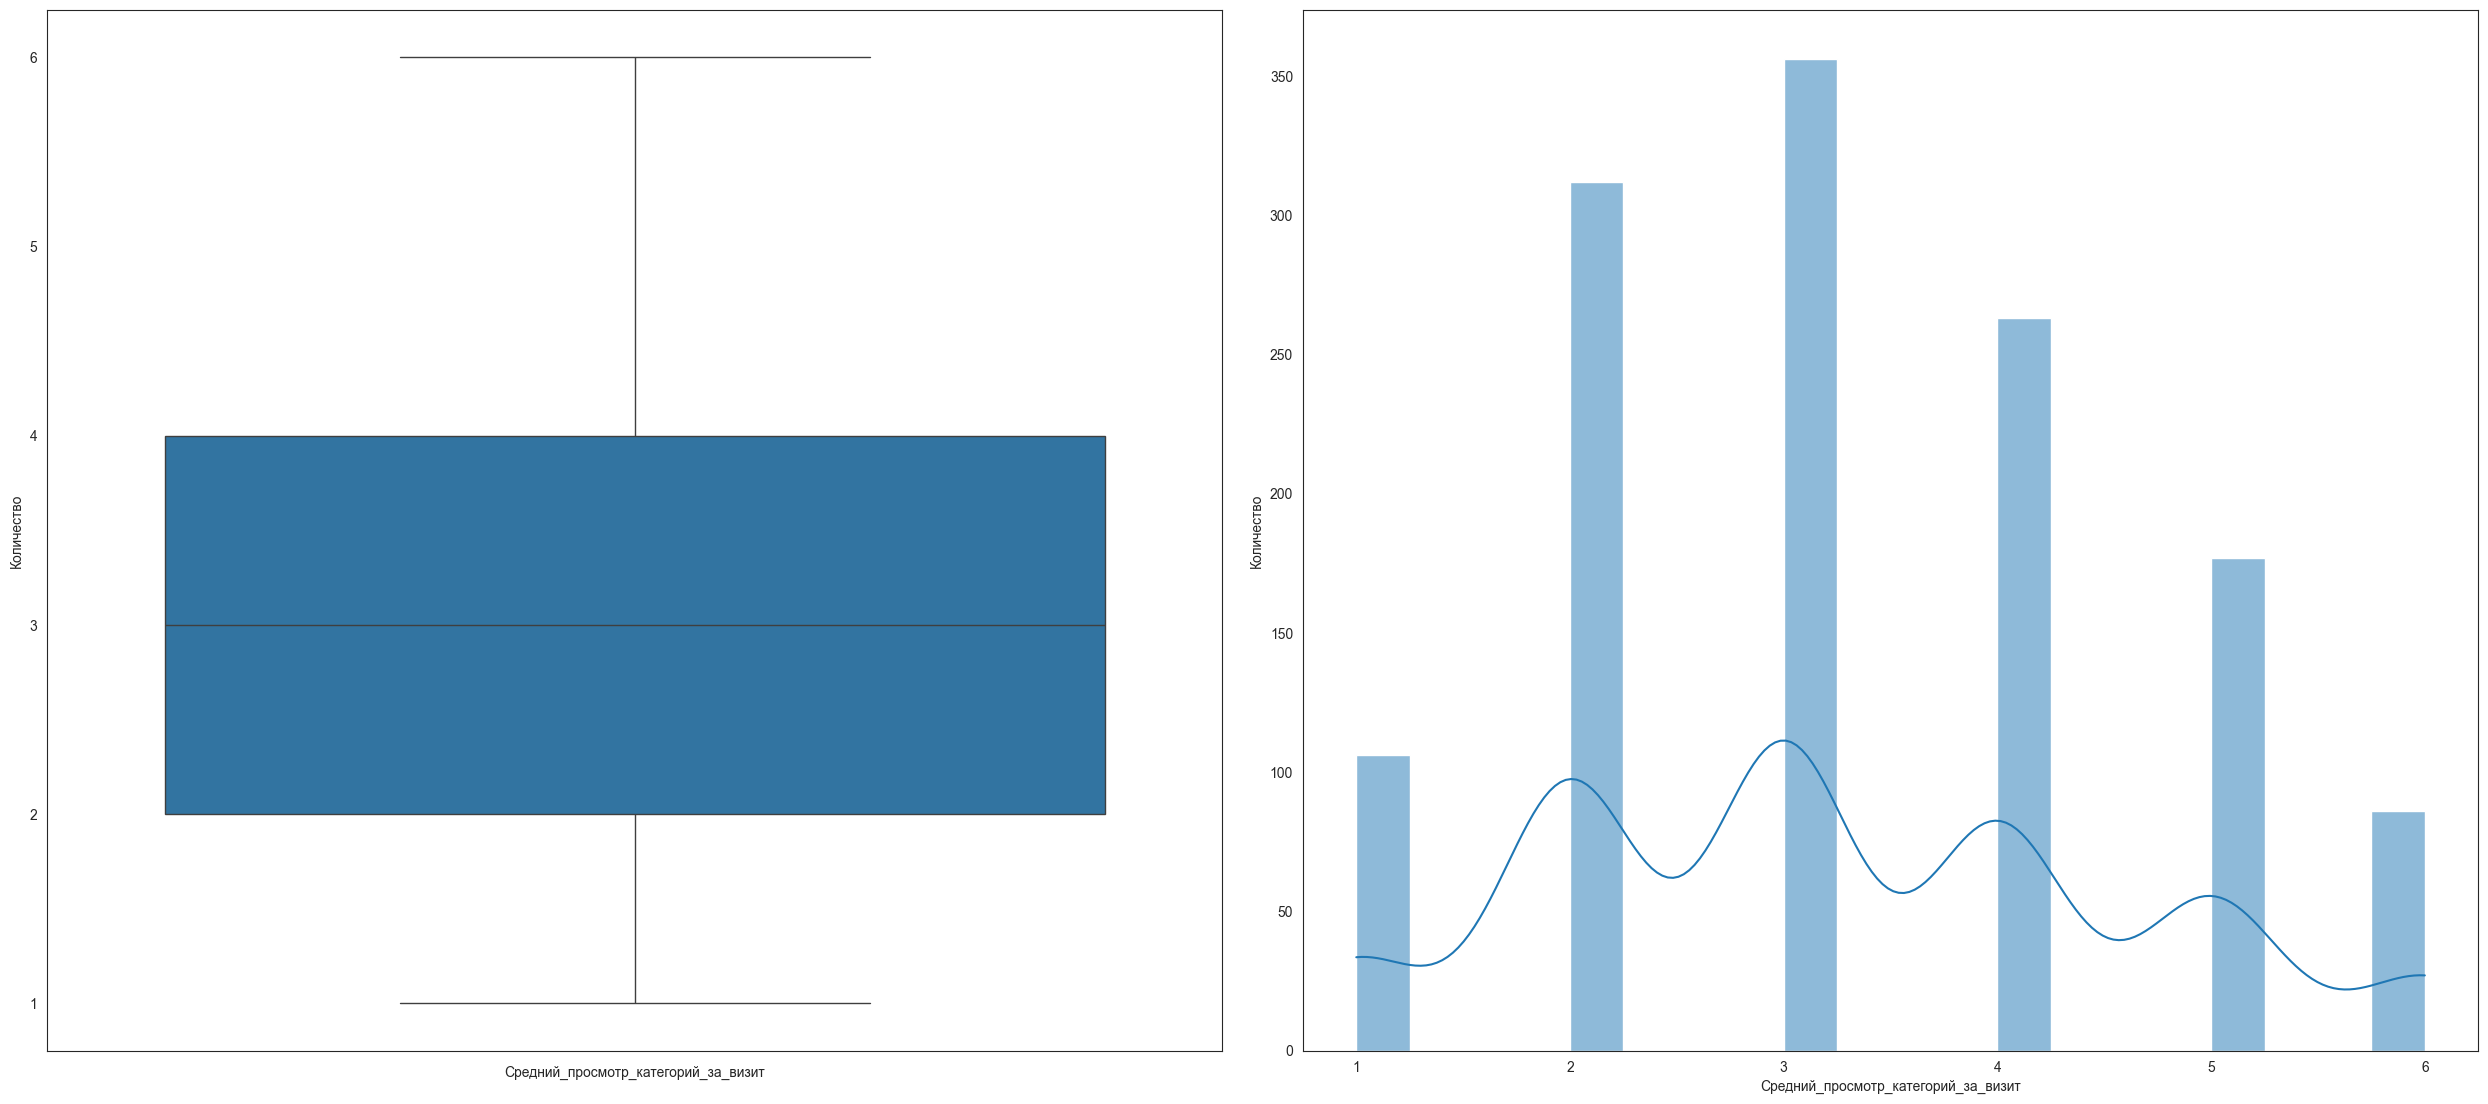

KstestResult(statistic=0.8957114065133592, pvalue=0.0, statistic_location=2, statistic_sign=-1)


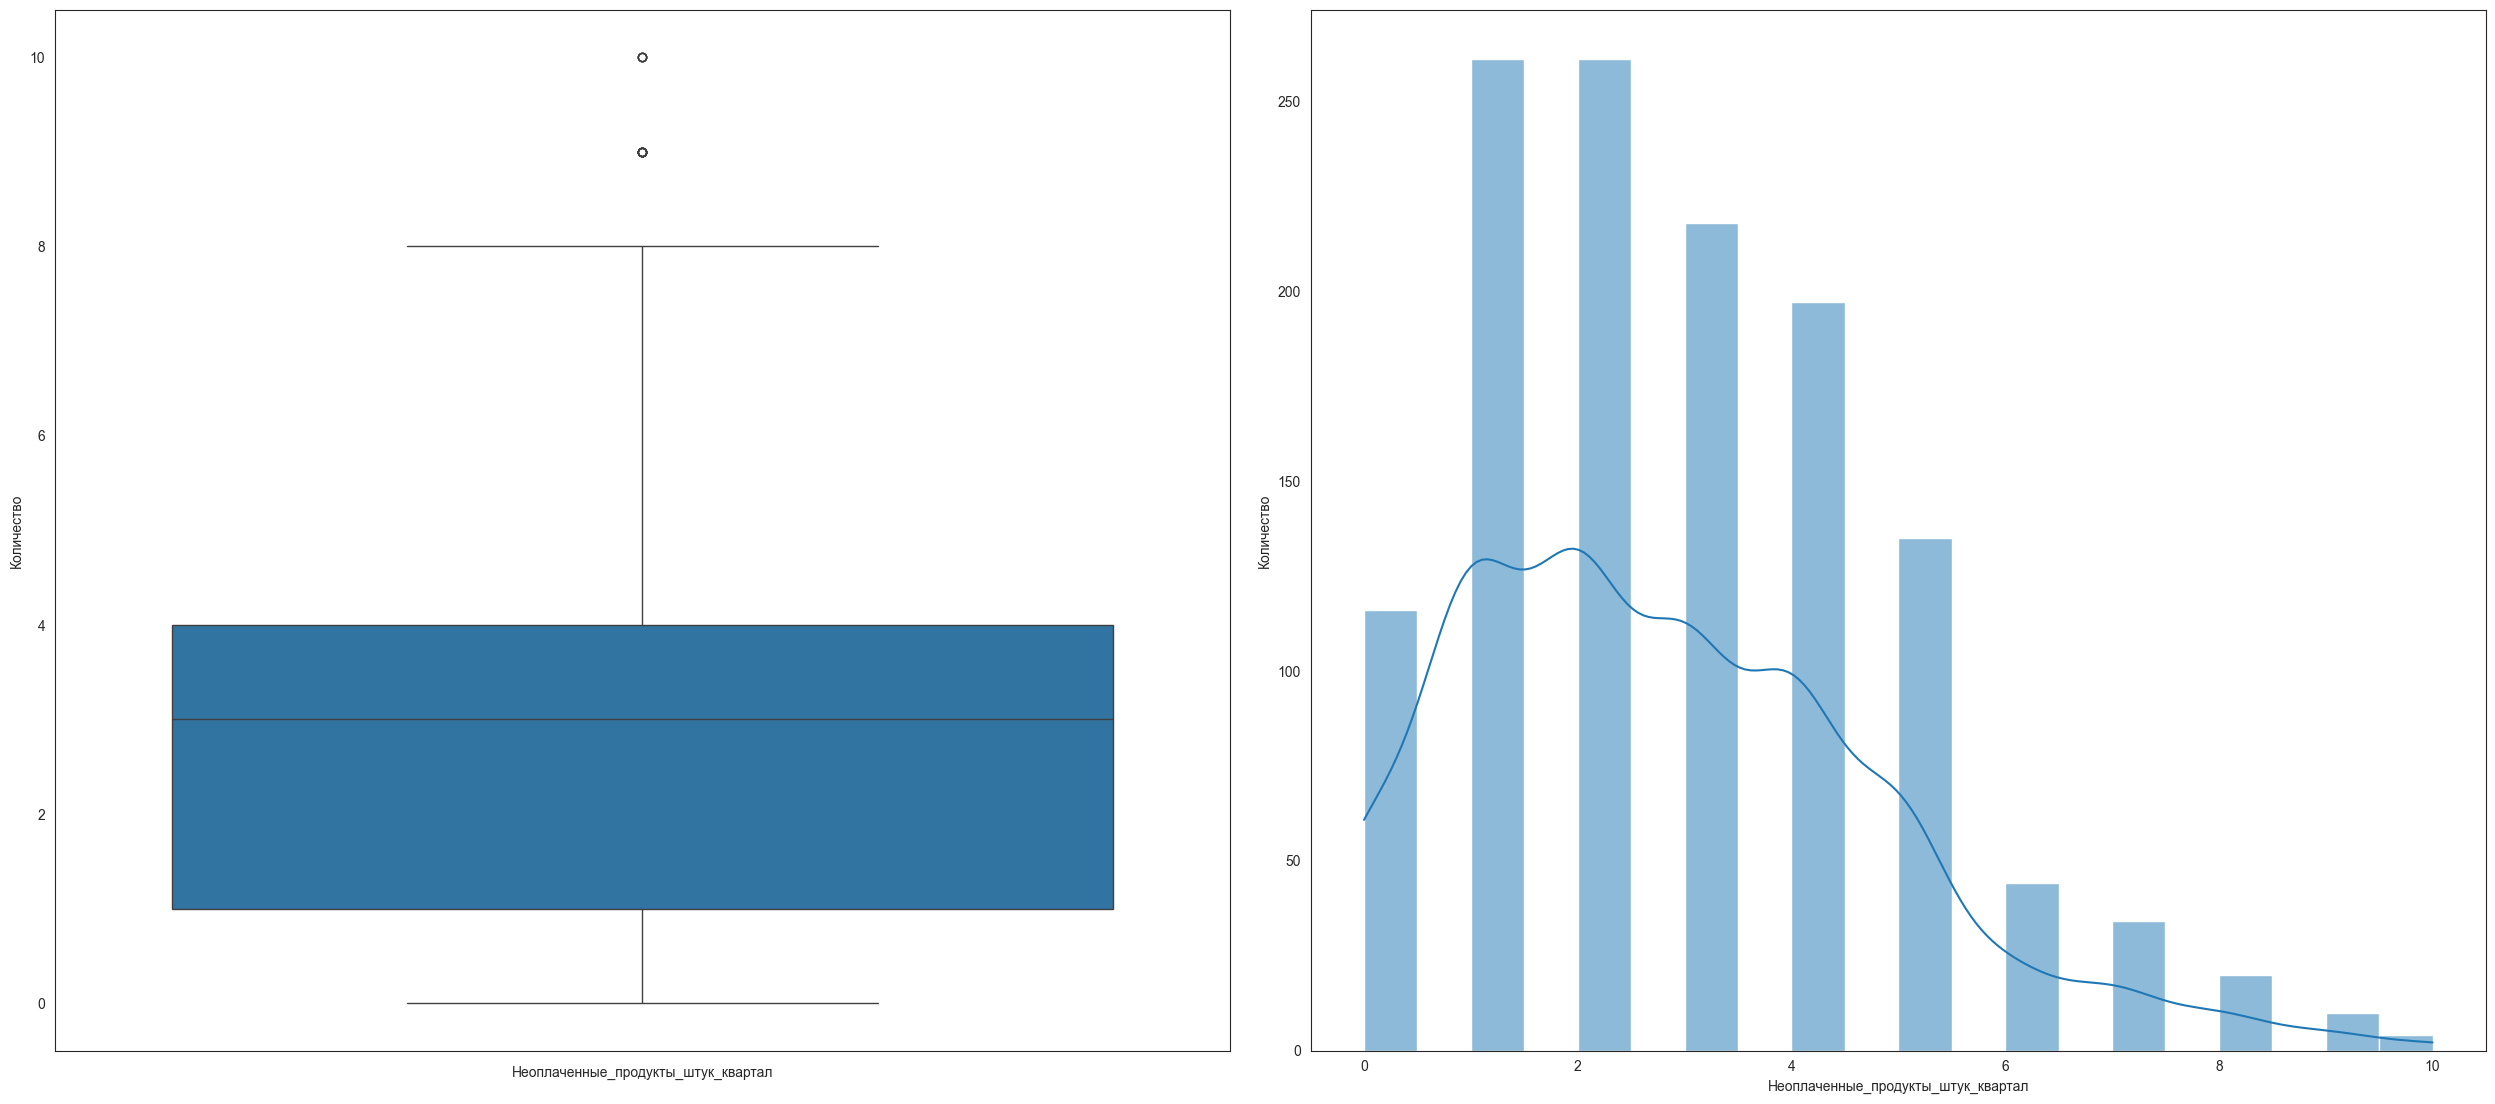

KstestResult(statistic=0.7521139768377737, pvalue=0.0, statistic_location=1, statistic_sign=-1)


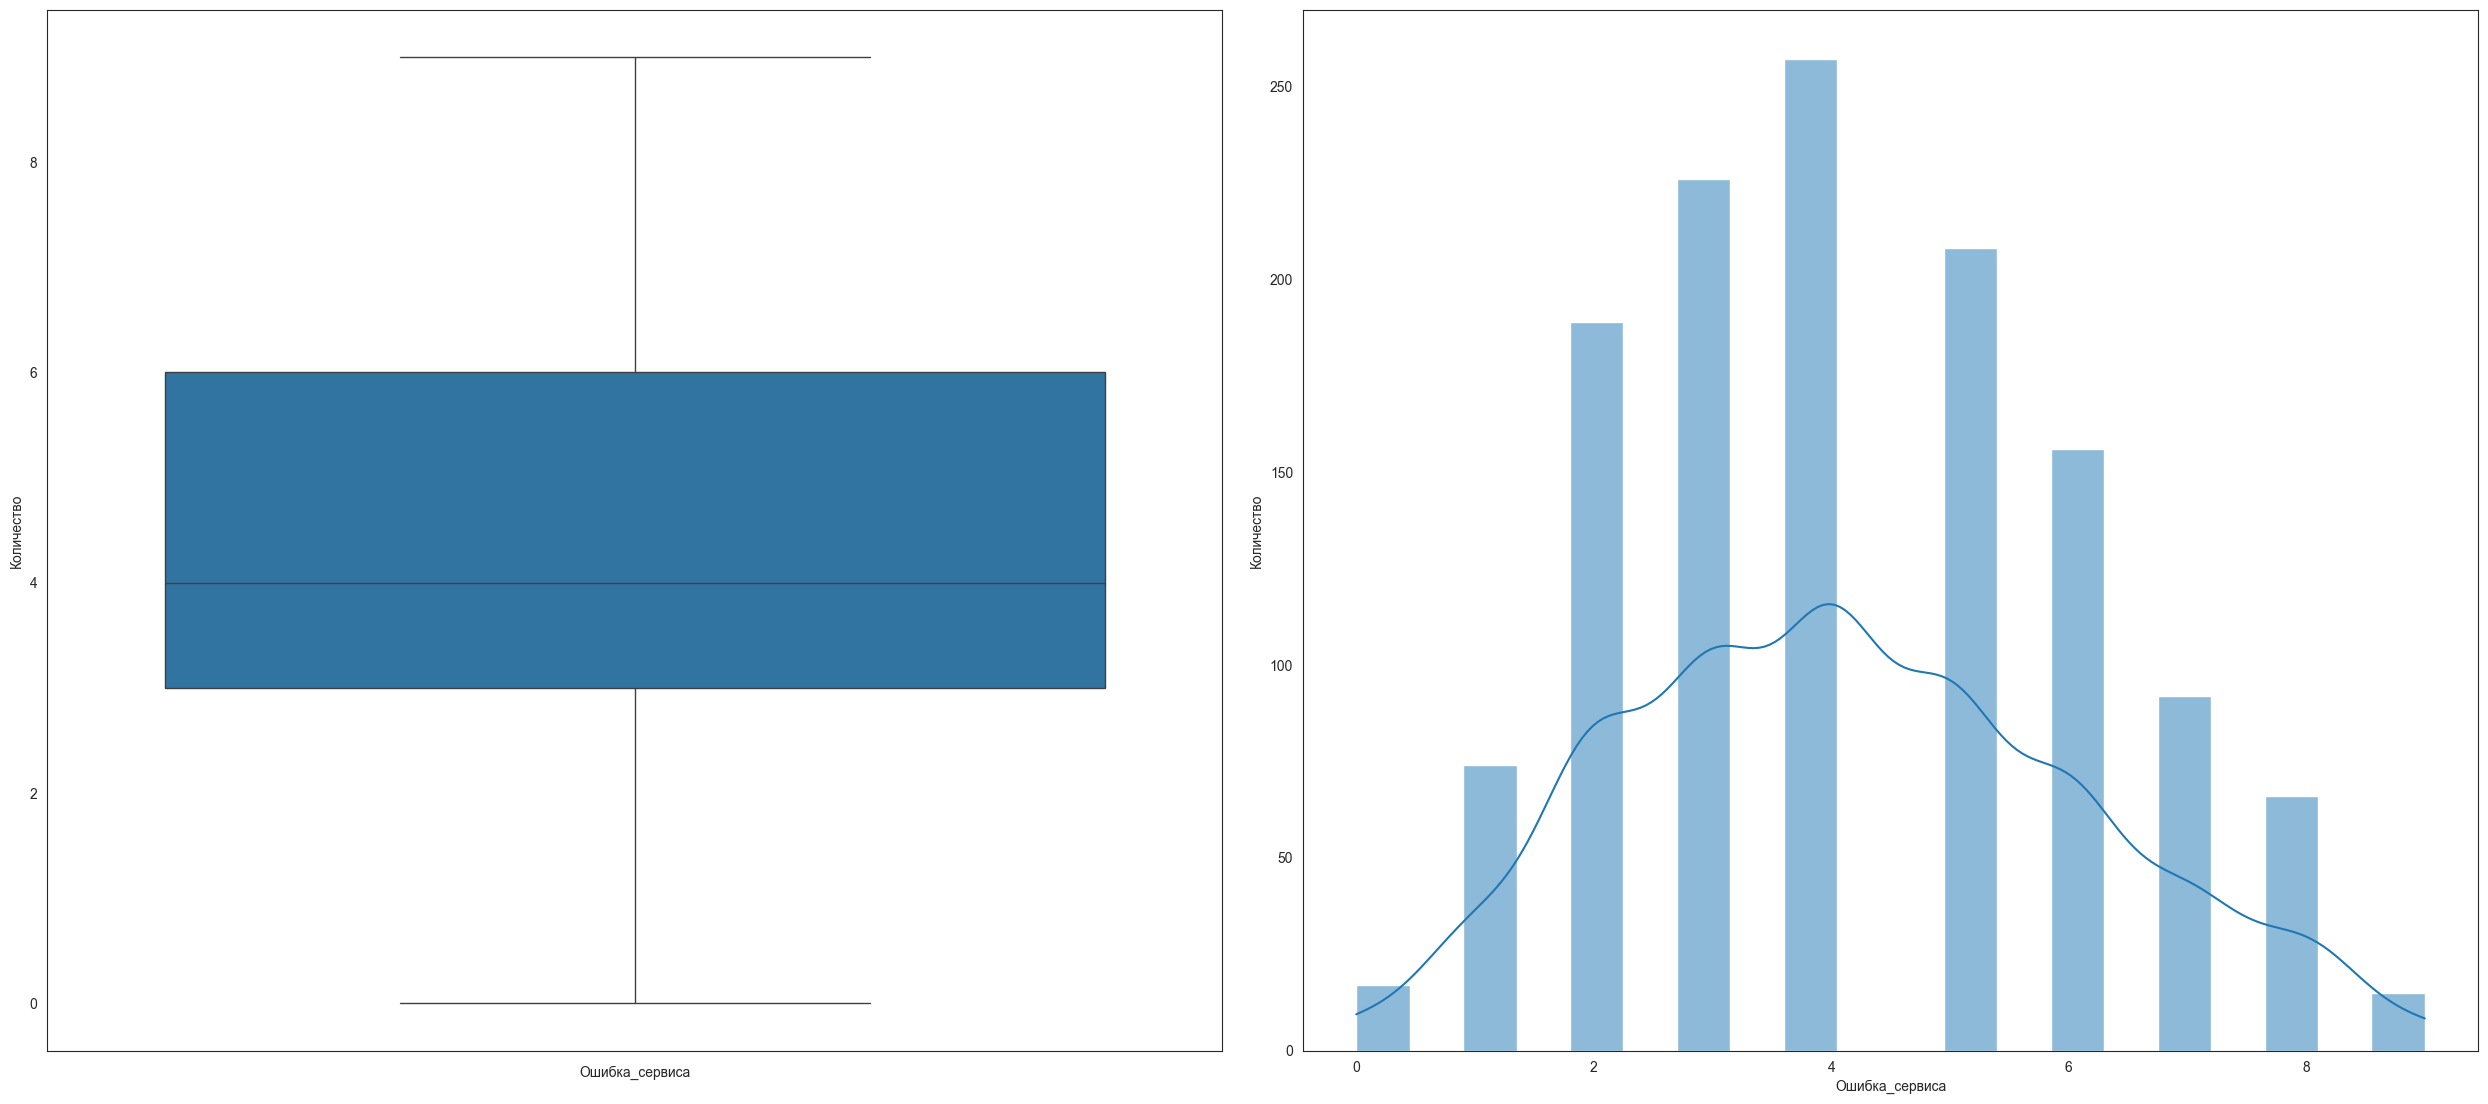

KstestResult(statistic=0.9072498680518208, pvalue=0.0, statistic_location=2, statistic_sign=-1)


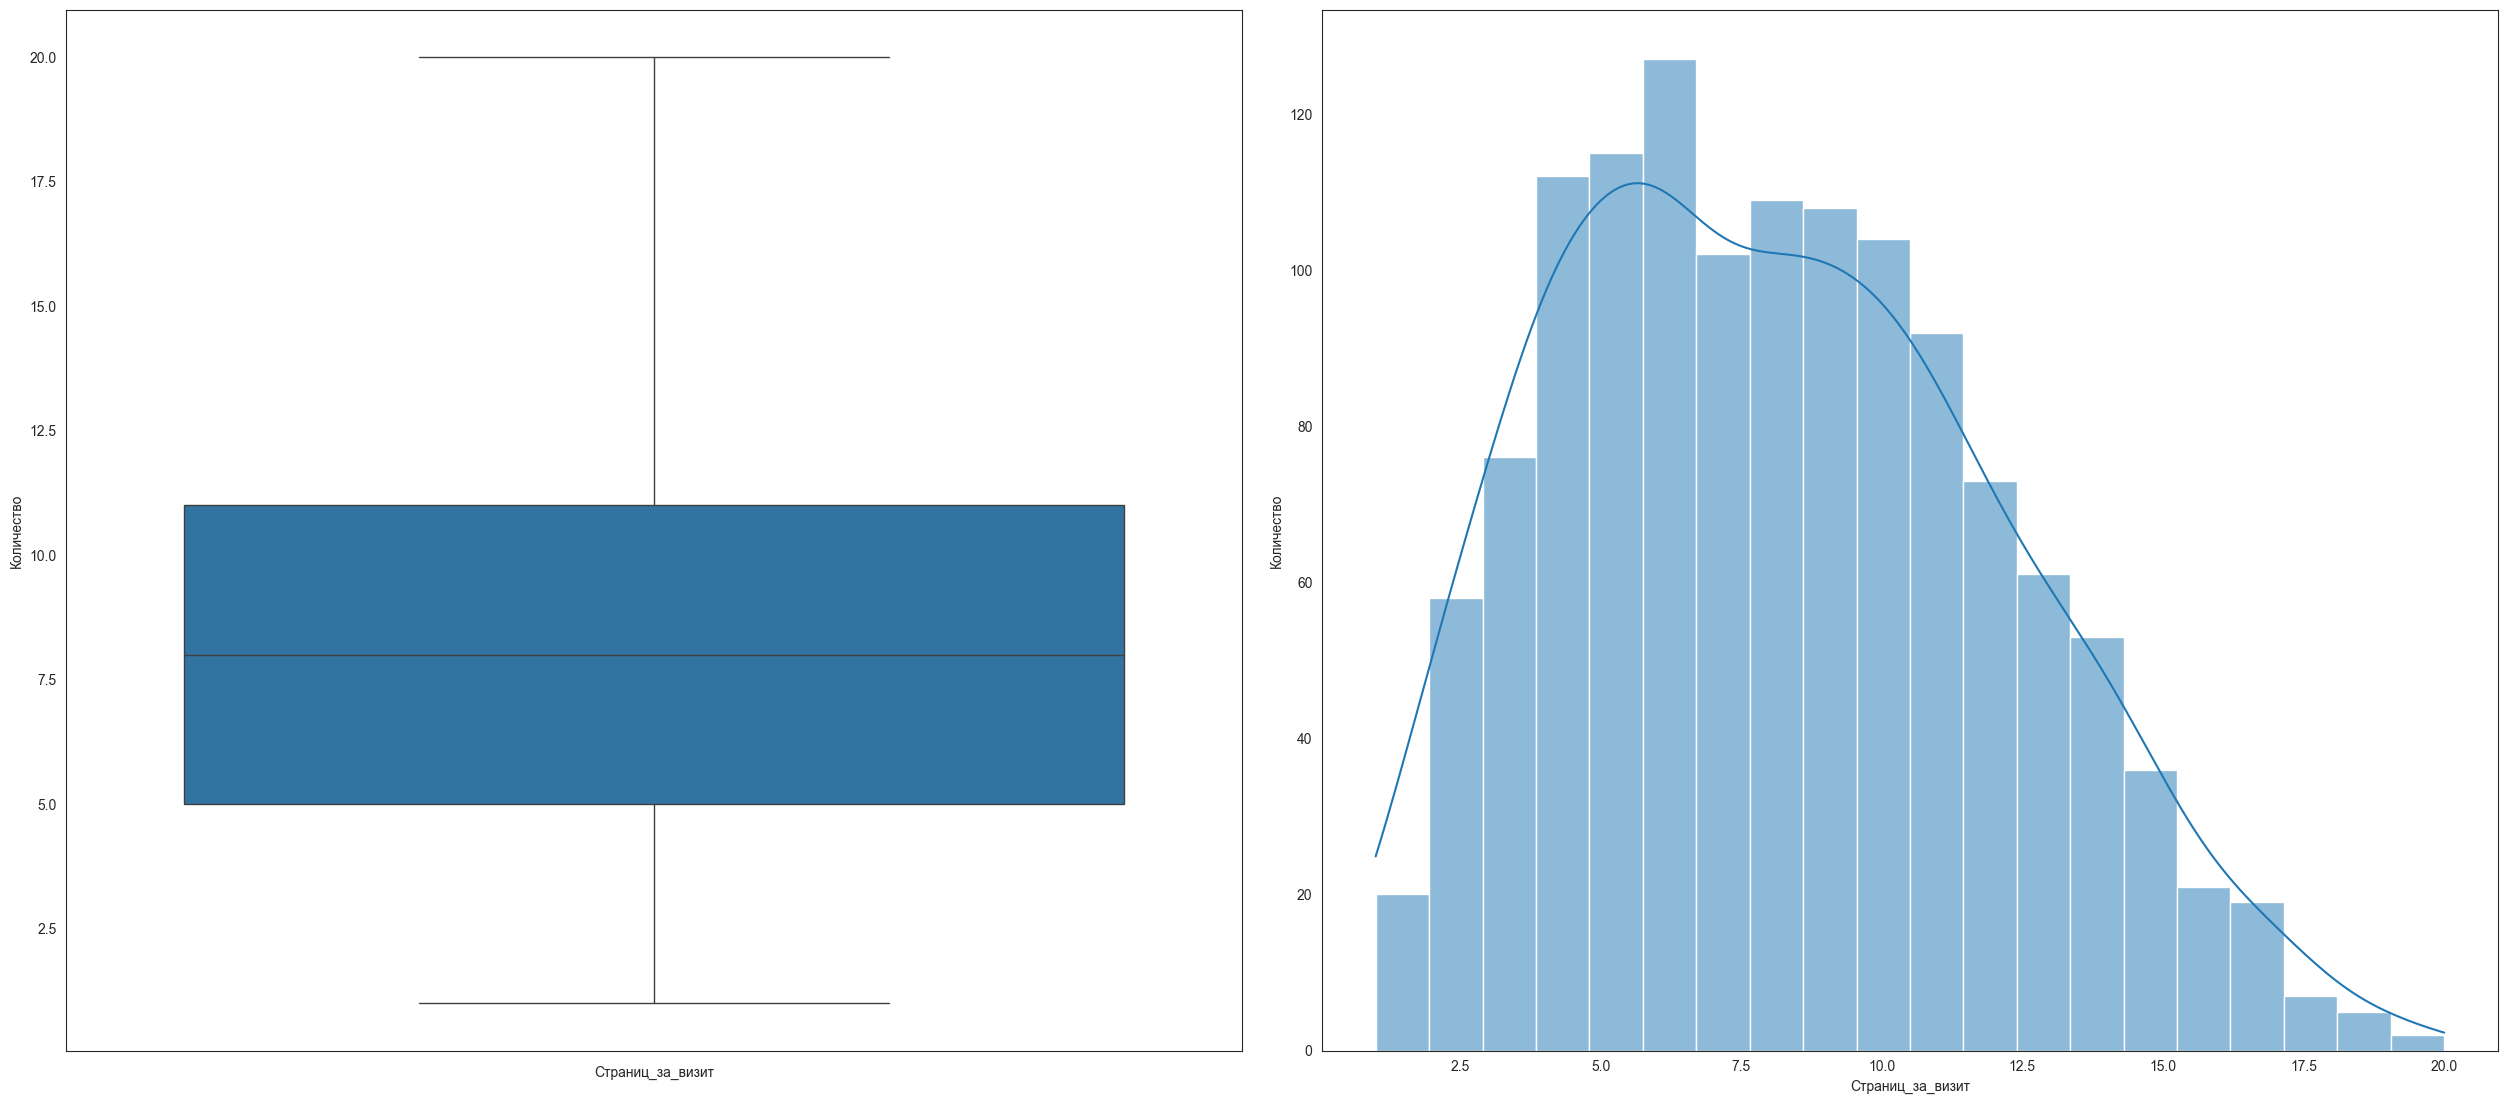

KstestResult(statistic=0.9618652526672054, pvalue=0.0, statistic_location=2, statistic_sign=-1)
"Пара графиков для таблицы df_market_money


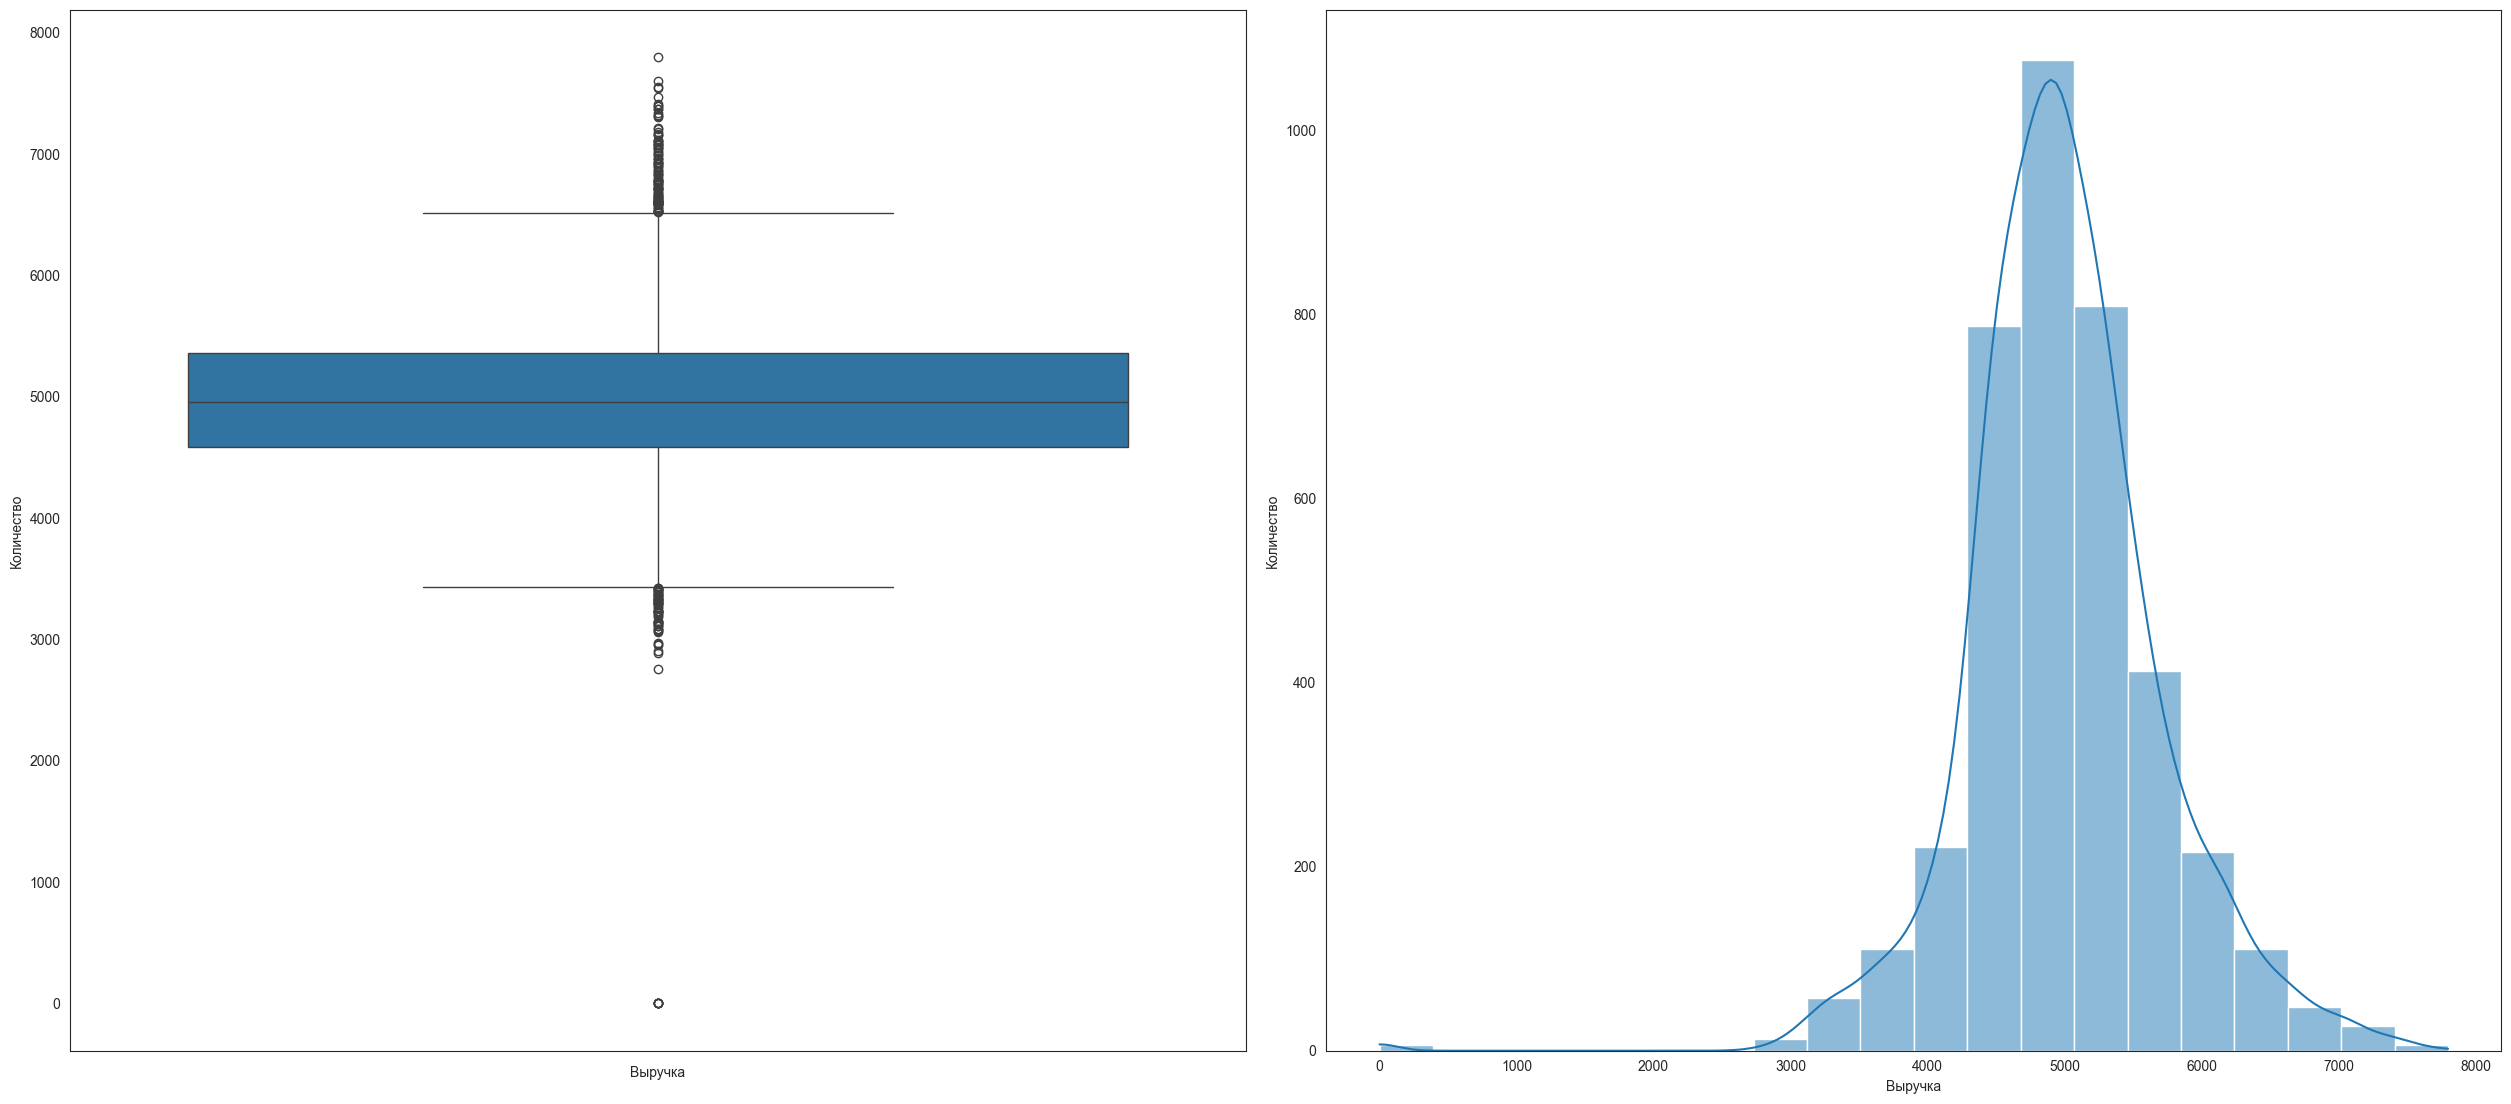

KstestResult(statistic=0.998461143883047, pvalue=0.0, statistic_location=2758.7, statistic_sign=-1)
"Пара графиков для таблицы df_market_time


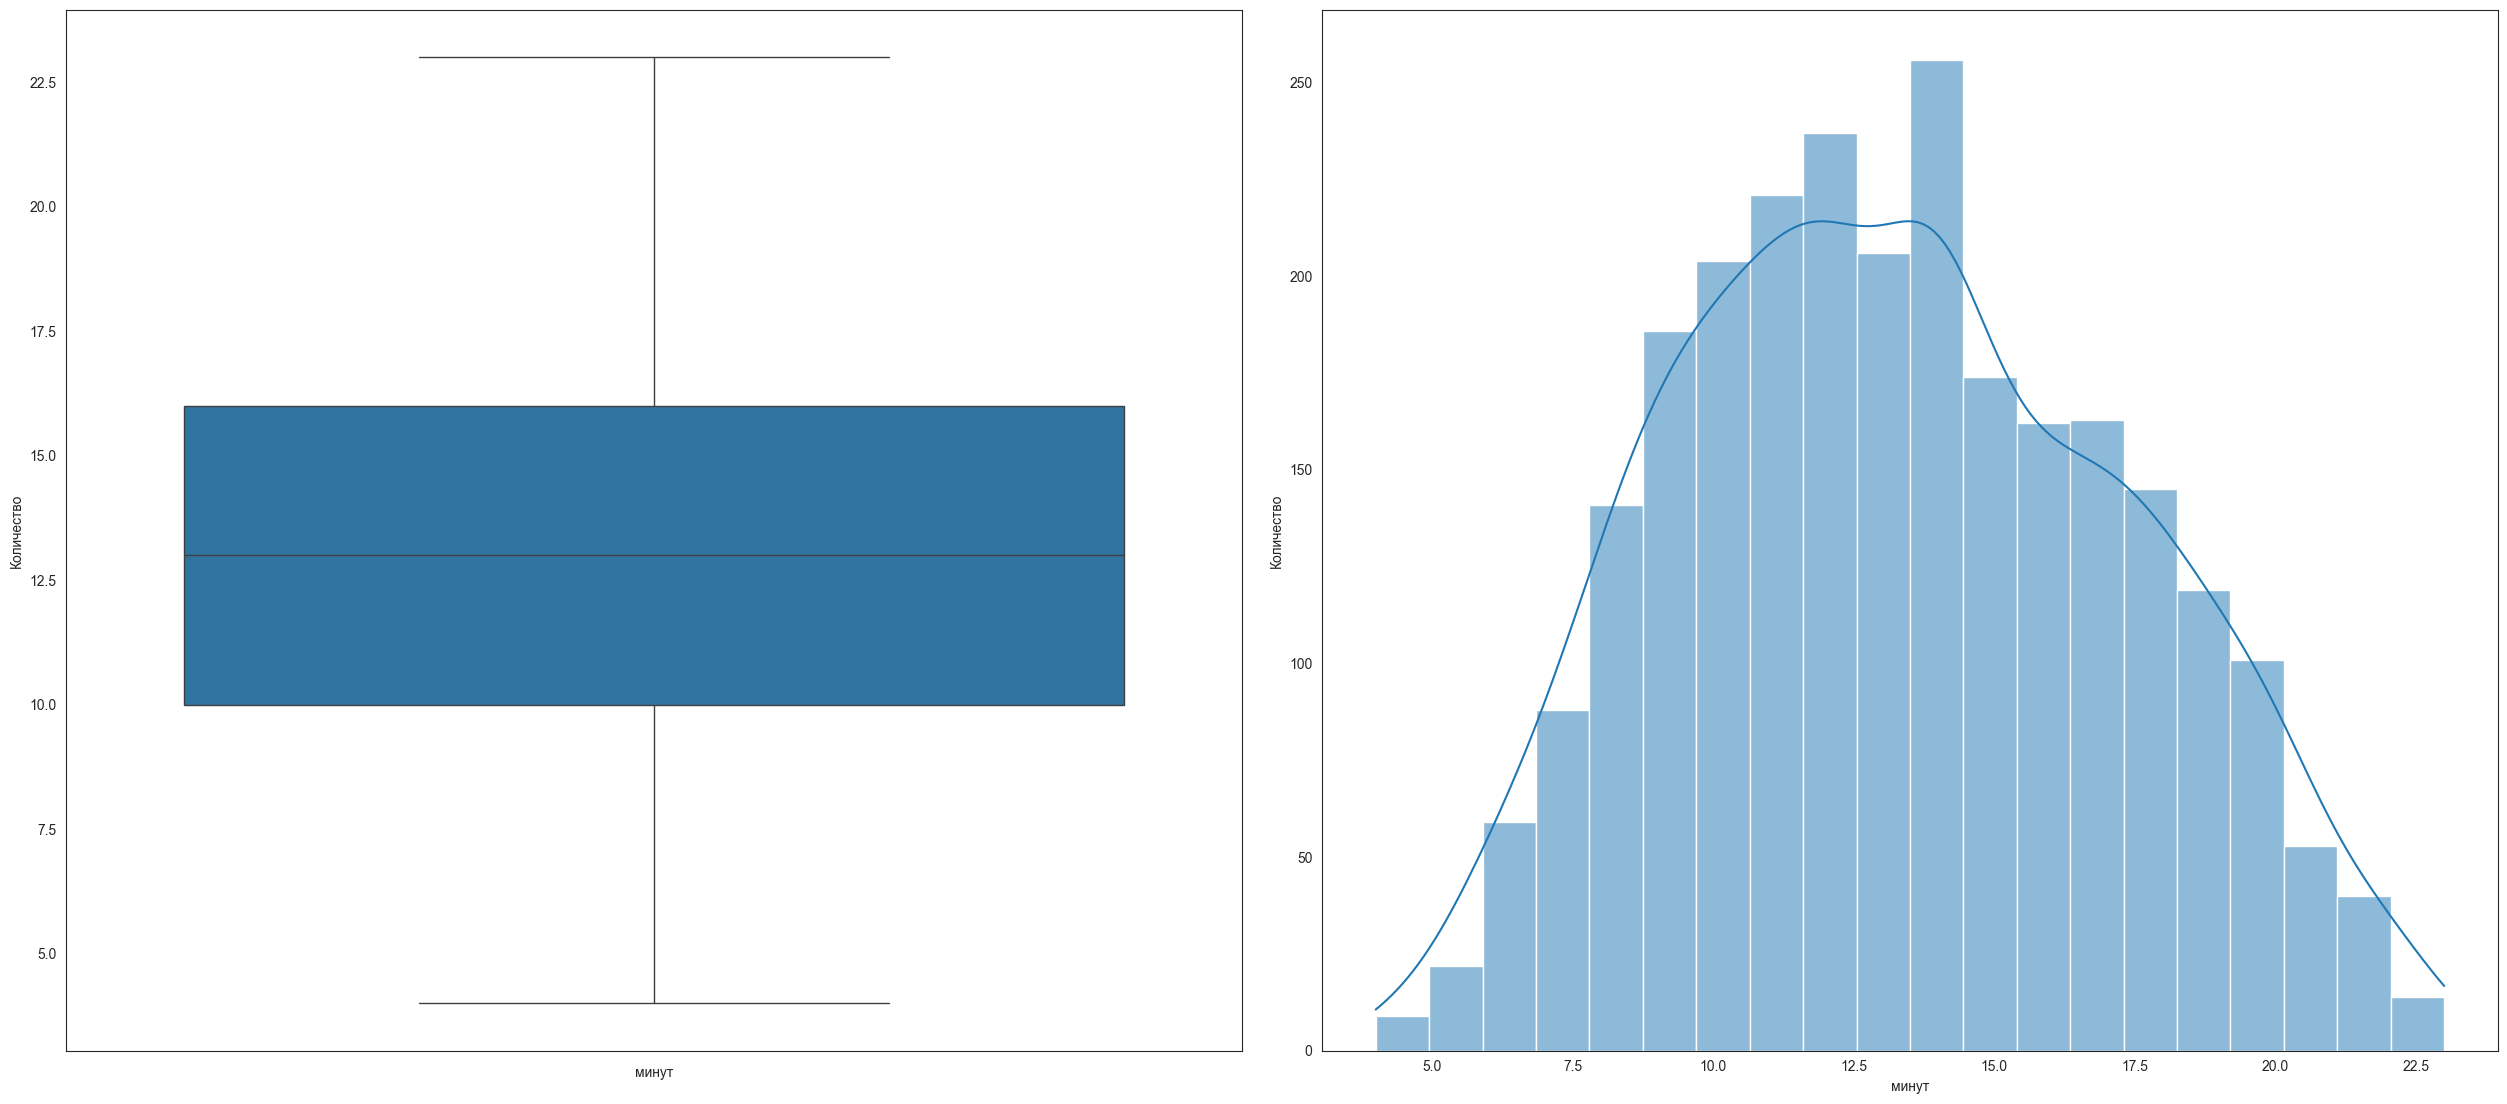

KstestResult(statistic=0.9999683287581669, pvalue=0.0, statistic_location=4, statistic_sign=-1)
"Пара графиков для таблицы df_money


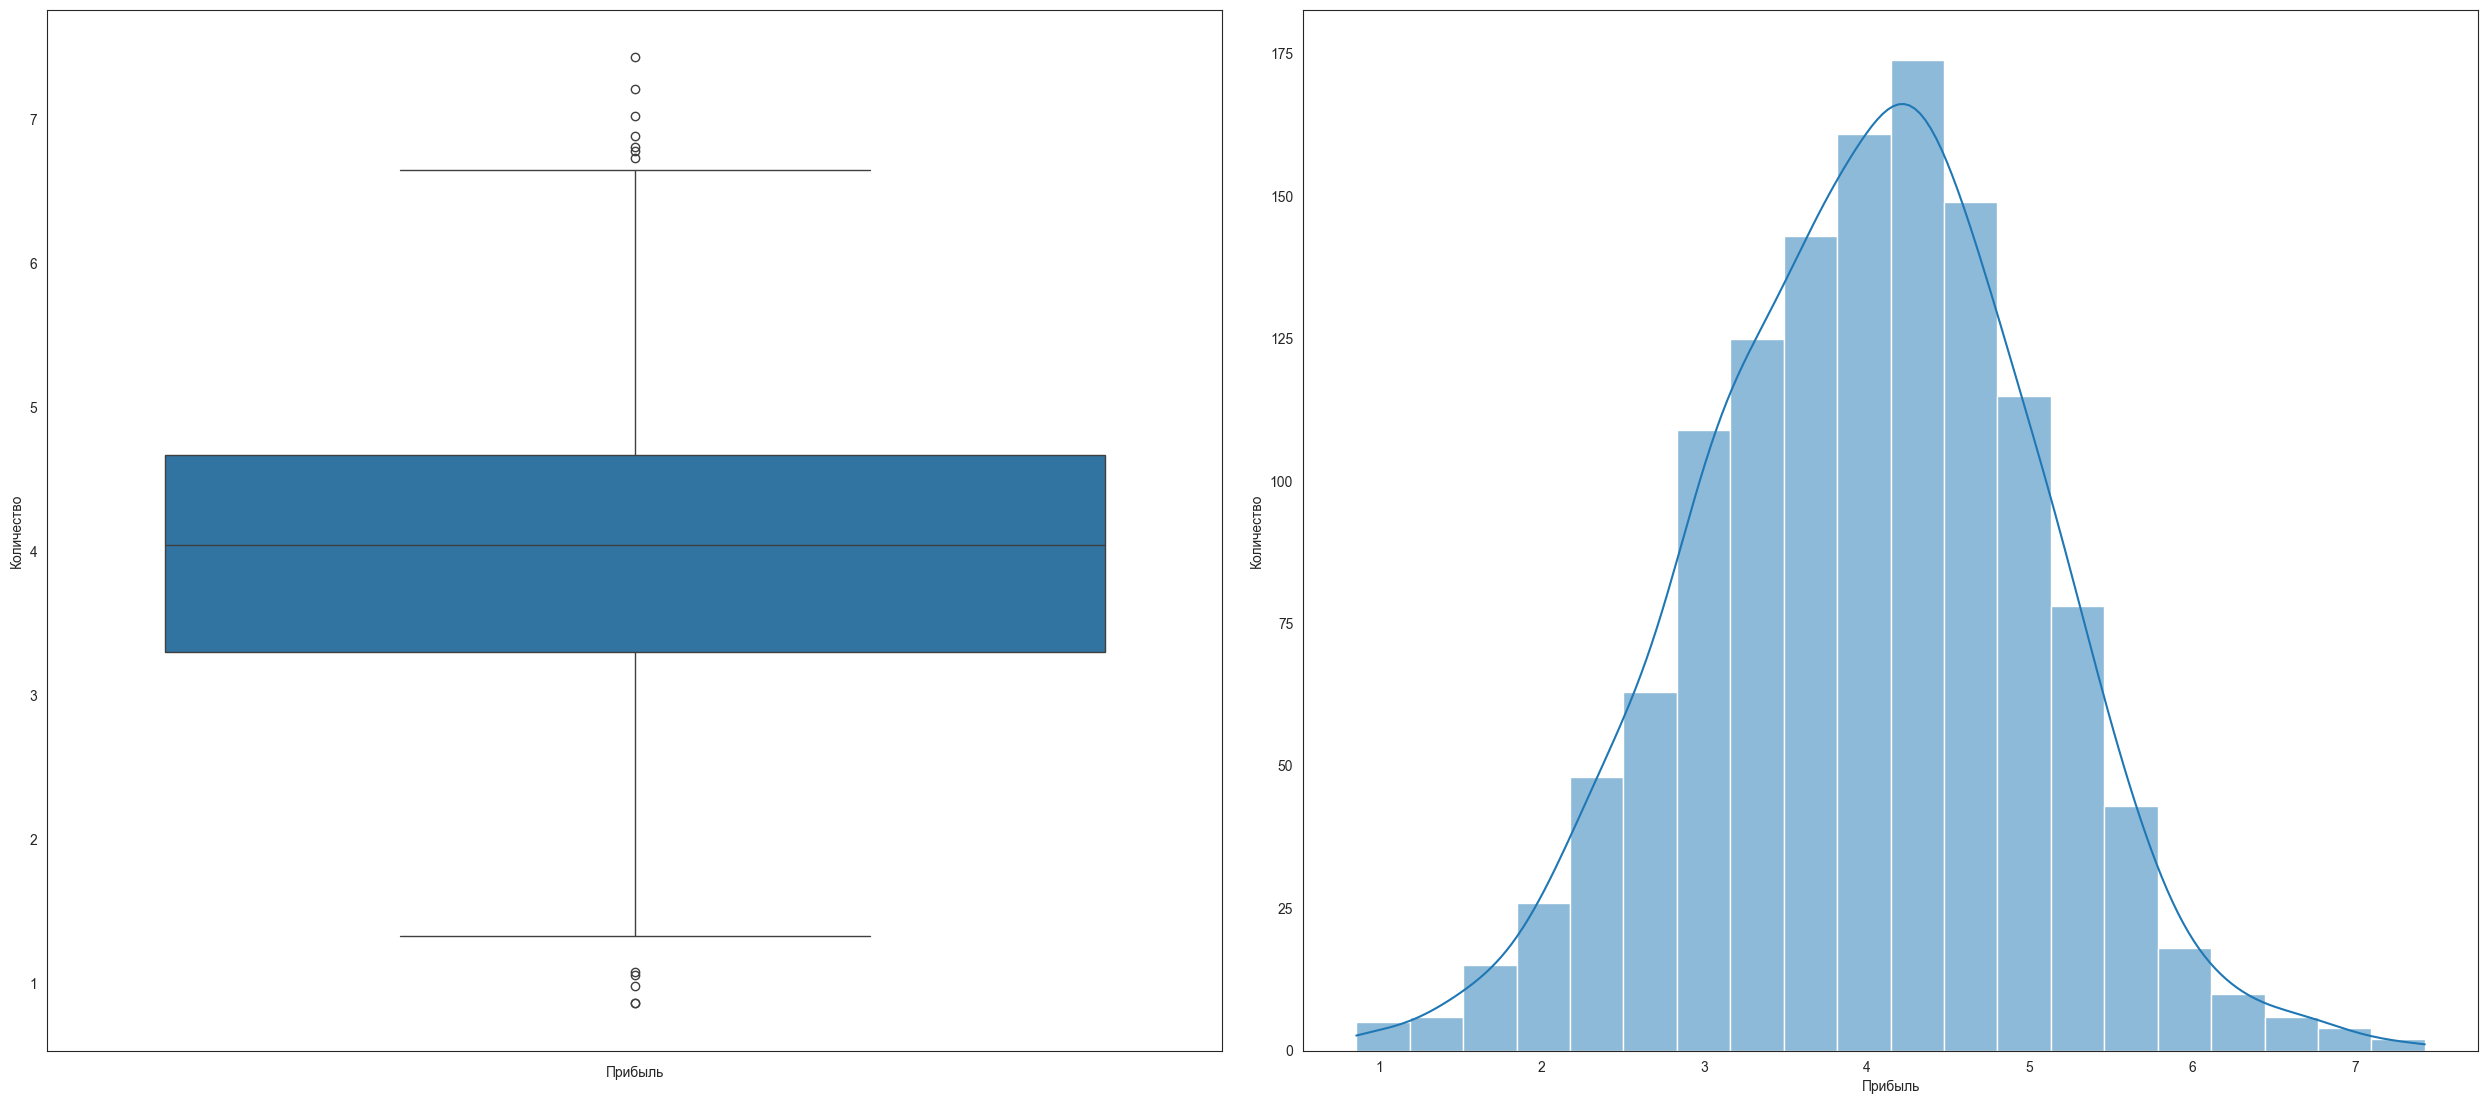

KstestResult(statistic=0.9534037142056669, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


In [111]:
for f in DF_NAMES[:5]:
    print(f'"Пара графиков для таблицы {f}')
    for c in globals()['col_num_' + f.strip('df_')]:
        if c != 'id':
            fig, axes = plt.subplots(1,2, figsize=(25, 11), constrained_layout=False)
            fig.tight_layout(h_pad=10,w_pad=3)
            axes = axes.ravel()
            ax = sns.boxplot(y=c, data=globals()[f], ax=axes[0])
            ax.set(xlabel=c, ylabel='Количество')
            ax = sns.histplot(x=c, data = globals()[f], bins=20, kde=True)
            ax.set(xlabel=c, ylabel='Количество')
            plt.show()
            print(kstest(globals()[f][c], 'norm'))

Из гистограм важным наблюдением является то, что целевой признак распределен не равномерно - приблизительно 2/3. В численных гистограммах присутствуют выбросы. Есть признаки с распределением близким к нормальному. Признак "Маркет_актив_тек_мес" показывает распределение более характерное для категориального признака.

<a id='t004'></a>  
# 4. Объединение таблиц

В задаче этот шаг разбит на 2 шага. Я объединил их в одном коде.

In [112]:
temp_df = pd.DataFrame()
df = pd.DataFrame()
temp_df = df_market_money.pivot(index = 'id',
                              values = 'Выручка',
                              columns = 'Период').reset_index().fillna(0)
temp_df.columns = ['id', 'month-1_money', 'month-2_money', 'month_cur_money']
display(temp_df[temp_df['id'] == 215380])  #215380
df = df_market_file.merge(temp_df, on = 'id', how='left')
temp_df = df_market_time.pivot(index = 'id',
                              values = 'минут',
                              columns = 'Период').reset_index().fillna(0)
temp_df.columns = ['id', 'month-1_time', 'month_cur_time']
df = df.merge(temp_df, on = 'id', how='left')
print(df.columns)
display(df)
del temp_df

,id,month-1_money,month-2_money,month_cur_money
32,215380,6077.0,5051.0,0.0


Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'month-1_money', 'month-2_money', 'month_cur_money',
       'month-1_time', 'month_cur_time'],
      dtype='object')


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,month-1_money,month-2_money,month_cur_money,month-1_time,month_cur_time
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


<a id='t054'></a>  
# 5. Корреляционный анализ

Т.к. чуть выше я наблюдал не нормальное распределение + наличие выбросов, то буду для корреляции использовать метод Спирмена.

<Figure size 1000x800 with 0 Axes>

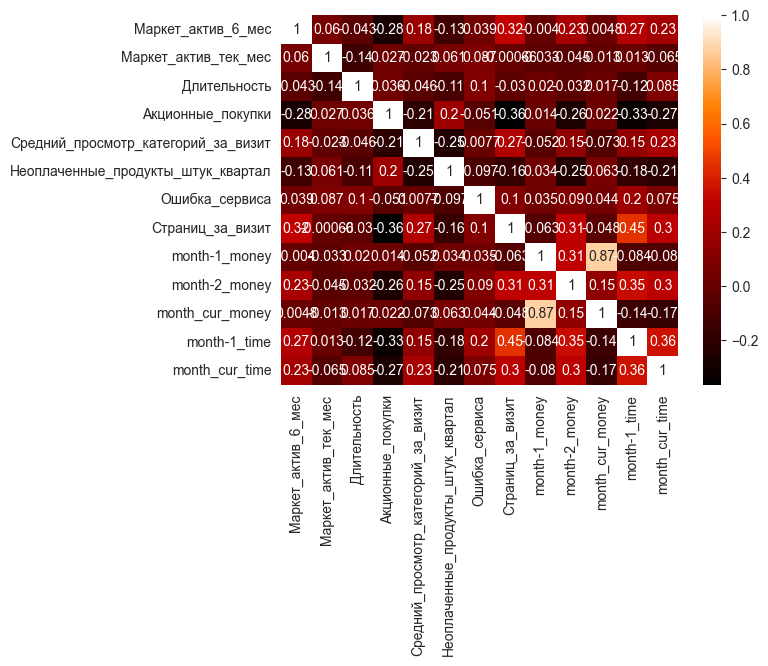

<Figure size 1000x800 with 0 Axes>

In [113]:
df = df.set_index('id')
dataplot = sns.heatmap(df[df.select_dtypes(exclude='object').columns.to_list()].corr(method='spearman'), cmap='gist_heat', annot=True) 
plt.figure(figsize=(10, 8))
#df.select_dtypes(include='object').columns.to_list()

По числовым признакам мультиколлинеарности не наблюдаю.

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'month-1_money', 'month-2_money', 'month_cur_money', 'month-1_time', 'month_cur_time']


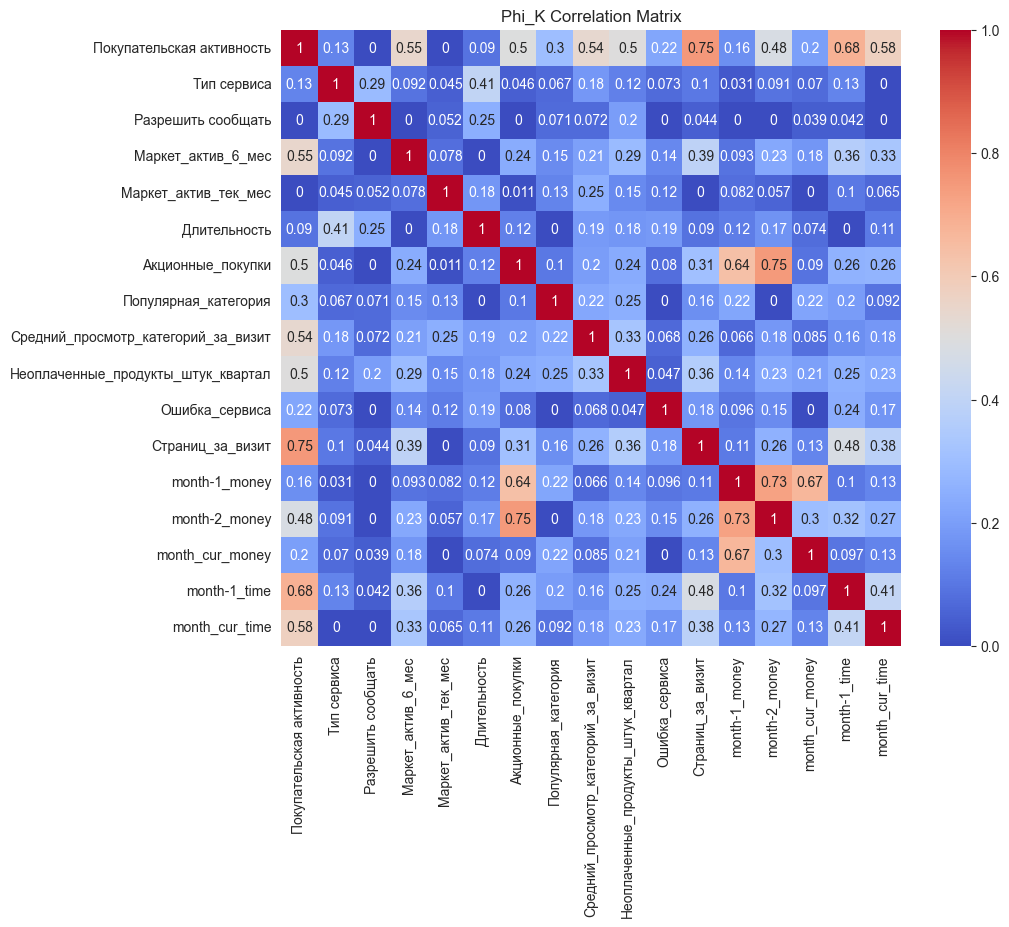

In [114]:
corr_matrix = df.phik_matrix()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

Я решил помимо количественных признаков заглянуть и в категориальные тоже. Тут нет мультиколлинеарности. Хорошая корреляция с принзаком "Страниц за визит", что потдается логике. Так же присутствует взаимосвязь с признаками описывающими нахождение на сайте, что так же логично.

<a id='t006'></a>  
# 6. Использование пайплайнов

## 6.1 Подготовка паплайна

In [115]:
display(df['Популярная_категория'].unique())
display(df[df.isna().any(axis=1)])

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,month-1_money,month-2_money,month_cur_money,month-1_time,month_cur_time
id,,,,,,,,,,,,,,,,,


Объявлю константы - списки столбцов с разными типами данных.

In [116]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

OHE_COLUMNS = ['Тип сервиса',
               'Разрешить сообщать'
               ]
ORD_COLUMNS = ['Популярная_категория']
NUM_COLUMNS = ['Маркет_актив_6_мес',
               'Маркет_актив_тек_мес',
               'Длительность',
               'Акционные_покупки',
               'month-1_money', 
               'month-2_money', 
               'month_cur_money' 
               ]

Подготовлю данные разбив их на тестовую и тренировучную выборки.

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Покупательская активность'], axis=1),
    df['Покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df['Покупательская активность']
)
X_train.shape, X_test.shape

((975, 16), (325, 16))

Кодирую целевые признаки

In [118]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [119]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Прежний уровень': 0, 'Снизилась': 1}


Создаю паплайн для подготовки признаков из списка OHE_COLUMNS.

In [120]:
ohe_pipe = Pipeline([('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))])

Создаю паплайн для признаков из списка ORD_COLUMNS

In [121]:
ord_pipe = Pipeline([('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ord', OrdinalEncoder(categories=[['Товары для детей', 
                                                         'Домашний текстиль', 
                                                         'Косметика и аксесуары', 
                                                         'Техника для красоты и здоровья', 
                                                         'Кухонная посуда', 'Мелкая бытовая техника и электроника']], 
                                            handle_unknown='use_encoded_value',
                                            unknown_value=np.nan)),
                     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

Создаю общий паплайн подготовки данных.

In [122]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, OHE_COLUMNS),
        ('ord', ord_pipe, ORD_COLUMNS),
        ('num', MinMaxScaler(), NUM_COLUMNS)
    ], 
    remainder='passthrough'
)

Объявлю словарь гиперпараметров моделей

In [123]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='saga', 
            penalty='l1'
        )],
        'models__C': range(1, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [SVC(
            #probability=True,
            random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10, 100, 1000],  
        #'models__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
        #'models__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    }
]

Итоговый паплайн

In [124]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

Определю автоматический поиск моделей через RandomizedSearchCV

In [125]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_grid, 
    scoring='roc_auc', 
    random_state=RANDOM_STATE,
    n_jobs=-1
)

## 6.2 Обучение модели

In [126]:
randomized_search.fit(X_train, y_train)

The max_iter was reached which means the coef_ did not converge


RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['Тип '
                                                                                'сервиса',
                                                                                'Разрешить '
                                                                                'сообщать']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('s...
                                                               'passthrough']},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='saga')],
                                         'models__C': range(1, 15),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(random_state=42)],
                                         'models__C': [0.1, 1, 10, 100, 1000],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

## 6.3 Выбор лучшей модели

In [127]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randomized_search.best_estimator_)
print("\n The best score across ALL searched params:\n", randomized_search.best_score_)
print("\n The best parameters across ALL searched params:\n", randomized_search.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Тип сервиса',
                                                   'Разрешить сообщать']),
                                                 ('o

In [128]:
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred):.2f}')

Метрика ROC-AUC на тестовой выборке: 0.87


Итого я получил, что лучшей моделью оказалась SVC с полиномиальным ядром, гамме 0.001 и "силой" модели 100.

<a id='t007'></a>  
# 7. Анализ важности признаков

## 7.1 Оценка важности признаков и построение графиков

Получу кодированные данные и модель из GridSearchCV. Для дальнейшей читабельности графиков данные передам в датафрейм и верну ему именование столбцов.

In [129]:
model = randomized_search.best_estimator_.named_steps['models']
df_named =pd.DataFrame(randomized_search.best_estimator_['preprocessor'].transform(X_train), 
                                              columns=X_train.columns.to_list())

Построю столбчатый график значимости признаков для выделенной модели.

<Axes: ylabel='Feature'>

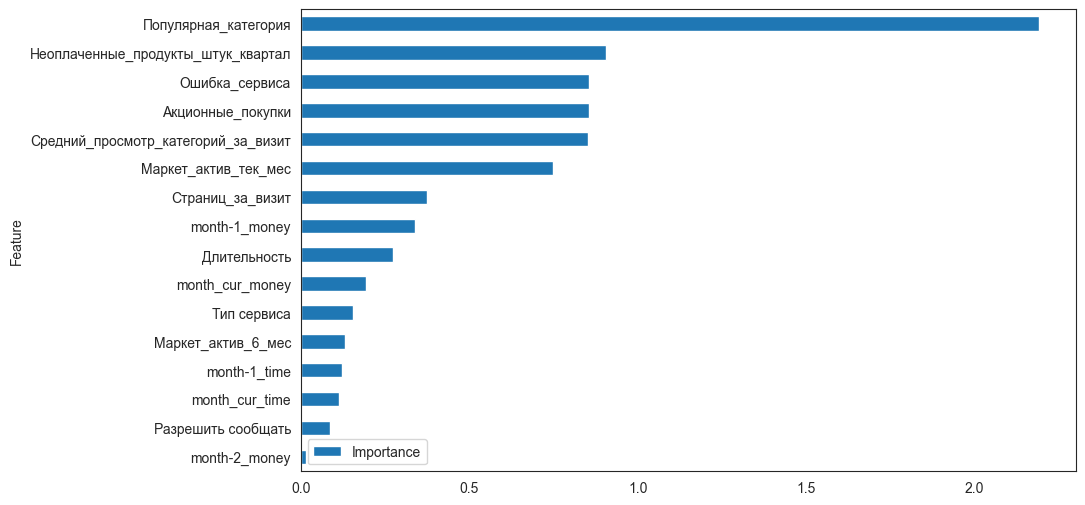

In [130]:
coefficients = model.coef_[0]
sns.set_style('white')
feature_importance = pd.DataFrame({'Feature': df_named.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)) 

### График BEESWARM

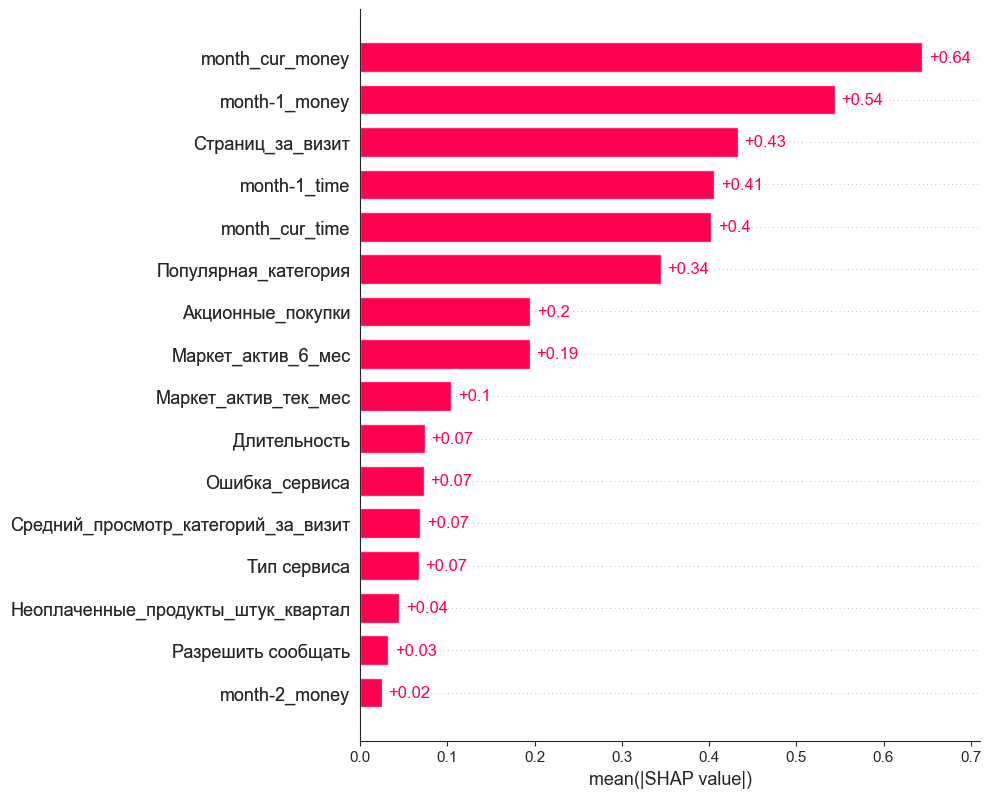

In [131]:
explainer = shap.LinearExplainer(model, df_named)
shap_values = explainer(df_named)
shap.plots.bar(shap_values, max_display=17) 


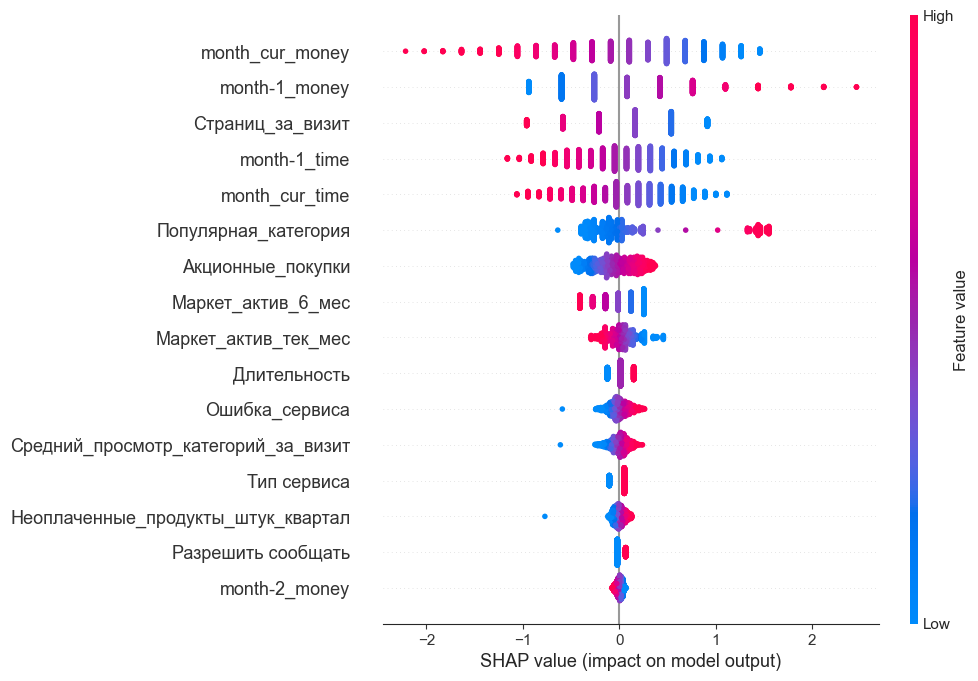

In [132]:
shap.plots.beeswarm(shap_values, max_display=17) 

## 7.2 Вывод о значимости признаков

Расположу вывод о влиянии признаков на модель по их дисперсии:
 - *выручка за текущий месяц* - на мой взгляд это почти признак вызывающий утечку целевого, но я не знаю, что лежит в оценки целевого признака и как он формируется. Признак сильно влияет на целевой, чем больше его значение тем вероятнее нулевое принятие решения модели. Признак не равносторонний;  
 - *выручка за прошлый месяц* - признак ведет себя инверсионно предыдущему. Но при этом высокие значения сильнее оказывает влияние на принятие моделью решения 1.
 - *страниц за визит* - равносторонний признак, высокие значения склоняют решение к 0.  
 - *время на сайте текущий месяц и время на сайте за предыдущий месяц* - два признака близнеца и по размерности и направленности. Высокие значения склоняют решения к 1. Признаки равносторонние.
 - *популярная категория* - признак ведет себя не равнозначно, существует некий всплеск сильно влияющий на решение 1. Вероятно есть некая категория сильно снижающая покупательную активность. Этому возможно стоит уделить дополнительное исследование.

Из графиков, полученных выше, я наблюдаю, что больше всего влияние на покупальскую активность сильное влияние оказывают признаки полученной прибыли мазагином от пользователя, причем они диаметрально противоположенны. Высокая прибыль текущего месяца положительно сказывается на покупательной активности, а прошлого месяца негативно.  
Признак пользователя "Количество страниц за визит" положительно влияет на целевой признак, а так же два следующих по порядку значимости признака (время на сайте этого и прошлого месяца) взаимосвязаны.  

<a id='t008'></a>  
# 8. Сегментация покупателей

Выделю покупателей, которые покупают только технику.

In [133]:
df_segmented = X_test[X_test['Популярная_категория'].isin(['Мелкая бытовая техника и электроника', 'Техника для красоты и здоровья'])]

Подготовлю данные для построения графиков

In [134]:
df_named = pd.DataFrame(randomized_search.best_estimator_['preprocessor'].transform(df_segmented), 
                                              columns=X_train.columns.to_list())
explainer = shap.LinearExplainer(model, df_named)
shap_values = explainer(df_named)

Построю график

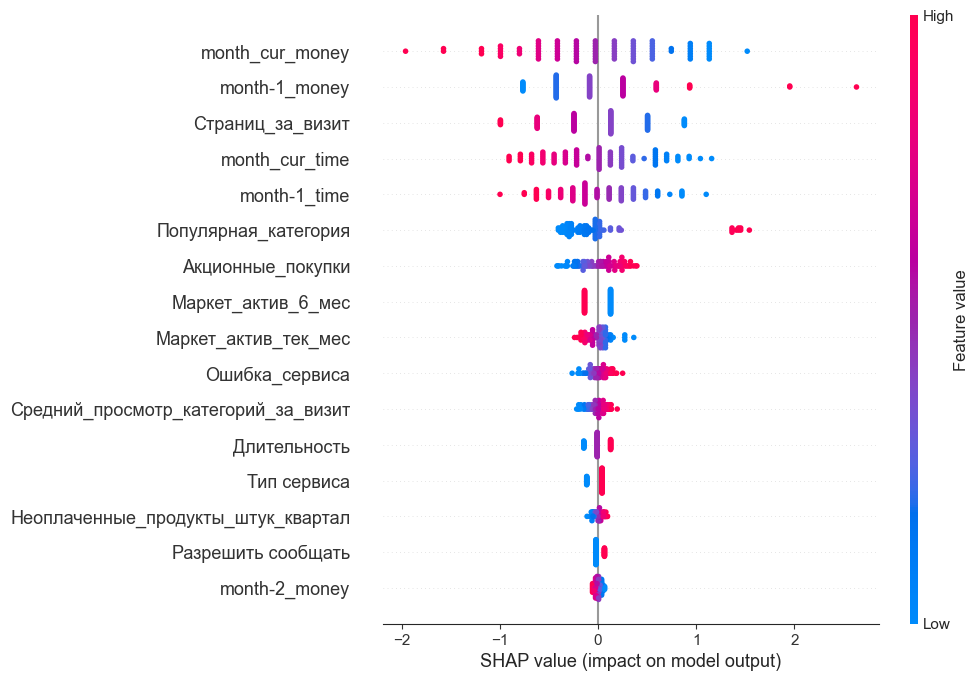

In [135]:
shap.plots.beeswarm(shap_values, max_display=17) 

Из графика видно, что на активность данного сегмента клиентов сильное влияние оказывает время проведенное на сайте и количество просмотренных страниц. Следовательно для поддержания активности этих покупателей необходимо различными способами стимулировать их длительное нахождение на сайте.

<a id='t009'></a>  
# 9. Общий вывод

Заказчик просит проанализировать переденные им данне и выяснить какие факторы влияют на покупательскую активность и дать рекомендации по ее улучшению.

Полученные данные из файлов прошли загруку, обработку, были устранены пропуски и дубликаты. Был произведен статистический анализ данных и их распеределение.

Для поиска лучше модели я использовал конвеер. Он подготавливал данные для обучения модели, перебирал различные модели и их гиперпараметры. Результаты оценивались метрикой и по ее результатам была отобрана лучшая модель с лучшими гиперпараметрами.  
Результат работы конвеера:
'preprocessor__num': MinMaxScaler(), 'models__C': 11, 'models': LogisticRegression(penalty='l1', random_state=42, solver='saga')

Результаты исследования указали на то, что для выбранной категории и для клиентов интернет магазина вцелом характерны одинаковые признаки влияющие на покупательную активность. Это количество просмотренный страниц и время проведенное на сайте. Чем больше времени пользователь проводит на сайте, то логично, что он просмотрит бОльшее количество страниц. Я считаю, что для повышения пользовательской активности необходимо разработать стратегию удержания пользоватей на сайте и возможно систему рекомендаций. 